# Import Package

In [1]:
import pandas as pd
#import pandas_profiling as pp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=all)
warnings.filterwarnings('ignore')

import plotly as py
#import cufflinks as cf
import seaborn as sns
from plotly.offline import iplot
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [2]:
#pip install plotly

In [3]:
myFile = '/Users/jazis/Downloads/Surveys_w_Target_v2.csv'

df = pd.read_csv(myFile,encoding = "ISO-8859-1")
#df = pd.read_csv('Surveys_w_Target_v2.csv',encoding = "ISO-8859-1", na_values='?')

df.head()

,Survey,Survey_Flag,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,...,Gender - Female,Gender - Male,Gender - Other,Q7_3_TEXT_To which gender identity do you most identify? - Prefer to self-describe - Text,Q9_What is your ZIP code?,Q29_Would you like to be one of the first to know when CURLe first products launch? - Selected Choice,"Q29_1_TEXT_Would you like to be one of the first to know when CURLe first products launch? - Yes, here's my email! - Text",Products _Base,Porosity_,Final_Target
0,New,1,10/13/2020 10:12,10/13/2020 10:15,IP Address,172.58.109.119,100,201,True,10/13/2020 10:15,...,1,0,0,NaN,75061.0,"Yes, here's my email!",samar9816@gmail.com,3.0,Medium,3_Medium
1,New,1,10/13/2020 10:13,10/13/2020 10:16,IP Address,172.58.111.163,100,199,True,10/13/2020 10:16,...,1,0,0,NaN,75063.0,"Yes, here's my email!",513salma.n@gmail.com,2.0,Low,2_Low
2,New,1,10/13/2020 10:20,10/13/2020 10:28,IP Address,68.249.0.5,100,450,True,10/13/2020 10:28,...,1,0,0,NaN,75063.0,"Yes, here's my email!",nwfftn@gmail.com,3.0,Medium,3_Medium
3,New,1,10/13/2020 11:57,10/13/2020 12:00,IP Address,172.56.6.149,100,218,True,10/13/2020 12:00,...,1,0,0,NaN,76137.0,NaN,NaN,3.0,Medium,3_Medium
4,New,1,10/18/2020 9:50,10/18/2020 9:53,IP Address,47.187.113.212,100,156,True,10/18/2020 9:53,...,1,0,0,NaN,75019.0,"Yes, here's my email!",melgharby@smu.edu,3.0,Medium,3_Medium


In [4]:
df.columns

Index(['Survey', 'Survey_Flag', 'StartDate', 'EndDate', 'Status', 'IPAddress',
       'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate',
       ...
       'Gender - Female', 'Gender - Male', 'Gender - Other',
       'Q7_3_TEXT_To which gender identity do you most identify? - Prefer to self-describe - Text',
       'Q9_What is your ZIP code?',
       'Q29_Would you like to be one of the first to know when CURLe first products launch? - Selected Choice',
       'Q29_1_TEXT_Would you like to be one of the first to know when CURLe first products launch? - Yes, here's my email! - Text',
       'Products _Base', 'Porosity_', 'Final_Target'],
      dtype='object', length=104)

In [5]:
df = df.rename({'Duration (in seconds)': 'Duration', 'RecipientLastName': 'LName',
                'RecipientFirstName':'FName','RecipientEmail':'Email','ExternalReference':'Reference',
                 'LocationLatitude':'Latitude','LocationLongitude':'Longitude', 'DistributionChannel':'Channel',
                 'UserLanguage':'Language','Q11_How long is your hair?':'HairLength',
                 'Q21_How long does your hair typically take to dry?':'DryingTime',
                 'Q22_When parting your hair, how much of your scalp do you see?':'ScalpNumber',
                 'Q20_How often do you see white or yellow flakes on your hair?':'FlakesFrequency',
                 'Q13_What is your hair type? If your hair is a combination of different types, choose the most common of them.':'HairType',
                 'Q15_What form of styling product do you prefer? - Selected Choice':'ProductStyling',
                 'Q15_8_TEXT_What form of styling product do you prefer? - None of these, I prefer... - Text':'ProductStylingTxt',
                 'Q17_What are your top 5 hair problems? (Select up to 5)':'HairProblem',
                 'Q23_If you have a beard, what are your top 3 beard problems? (Select up to 3)':'BeardProblems',
                 'Q19_How does your scalp typically feel two or three days after you wash it?':'ScalpfeelWash',
                 'Q21_Take a single strand of your hair and roll it between your fingers with your eyes closed. What best describes your strand?':'Strand',
                 'Q18_How much of your hair has greyed?':'HairGreyed',
                 'Q30_Have you treated your hair with any of these treatments recently or will you soon?':'HairTreatment',
                 'Q19_How often do you treat your hair with heat or color-treatments like hair dye?':'HairDry',
                 'Q27_How do you like your products to smell?':'ProductSmell',
                 'Q5_Choose one or more races that you consider yourself to be: - Selected Choice':'Races',
                 'Q5_8_TEXT_Choose one or more races that you consider yourself to be: - Other - Text':'RaceTxt',
                 'Q3_What is your age range?':'AgeRange',
                 'Q32_List of Countries':'Countries',
                 'Q7_To which gender identity do you most identify? - Selected Choice':'Sex',
                 'Q7_3_TEXT_To which gender identity do you most identify? - Prefer to self-describe - Text':'SexTxt',
                 'Q9_What is your ZIP code?':'ZipCode',
                 'Q29_Would you like to be one of the first to know when CURLe first products launch? - Selected Choice':'productsLaunch',
                 'Q29_1_TEXT_Would you like to be one of the first to know when CURLe first products launch? - Yes, here\'s my email! - Text':'productsLaunchTxt'
                }, axis=1) 

df.head()

,Survey,Survey_Flag,StartDate,EndDate,Status,IPAddress,Progress,Duration,Finished,RecordedDate,...,Gender - Female,Gender - Male,Gender - Other,SexTxt,ZipCode,productsLaunch,productsLaunchTxt,Products _Base,Porosity_,Final_Target
0,New,1,10/13/2020 10:12,10/13/2020 10:15,IP Address,172.58.109.119,100,201,True,10/13/2020 10:15,...,1,0,0,NaN,75061.0,"Yes, here's my email!",samar9816@gmail.com,3.0,Medium,3_Medium
1,New,1,10/13/2020 10:13,10/13/2020 10:16,IP Address,172.58.111.163,100,199,True,10/13/2020 10:16,...,1,0,0,NaN,75063.0,"Yes, here's my email!",513salma.n@gmail.com,2.0,Low,2_Low
2,New,1,10/13/2020 10:20,10/13/2020 10:28,IP Address,68.249.0.5,100,450,True,10/13/2020 10:28,...,1,0,0,NaN,75063.0,"Yes, here's my email!",nwfftn@gmail.com,3.0,Medium,3_Medium
3,New,1,10/13/2020 11:57,10/13/2020 12:00,IP Address,172.56.6.149,100,218,True,10/13/2020 12:00,...,1,0,0,NaN,76137.0,NaN,NaN,3.0,Medium,3_Medium
4,New,1,10/18/2020 9:50,10/18/2020 9:53,IP Address,47.187.113.212,100,156,True,10/18/2020 9:53,...,1,0,0,NaN,75019.0,"Yes, here's my email!",melgharby@smu.edu,3.0,Medium,3_Medium


In [6]:
pd.set_option('display.max_columns', None)

df.head()

,Survey,Survey_Flag,StartDate,EndDate,Status,IPAddress,Progress,Duration,Finished,RecordedDate,ResponseId,LName,FName,Email,Reference,Latitude,Longitude,Channel,Language,HairLength,Hair_Length,DryingTime,Dry_Time,ScalpNumber,Scalp_Show,FlakesFrequency,Hair_Flakes,HairType,ProductStyling,Styling Product - Custard,Styling Product - Gel,Styling Product - Hair Spray,Styling Product - Hair Wax/Pomade,Styling Product - Mousse,Styling Product - Oil,Styling Product - Styling Cream,"Styling Product - None of these, I prefer...",ProductStylingTxt,HairProblem,Concerns - Baldness,Concerns - Breakage,Concerns - Dandruff,Concerns - Dry Scalp,Concerns - Dull hair strands,Concerns - Frizz,Concerns - Chemical and Heat Damage,Concerns - Hair Growth,Concerns - Oily Scalp,Concerns - Other,Concerns - Rough/Dry Hair,Concerns - Split Ends,Concerns - Thinning,Concerns - Too Little Volume,Concerns - Too Much Volume,Concerns - Pregnancy Related Thinning,Concerns - Baldness/Alopecia,BeardProblems,Beard_Flag,Beard Concern - Brittle/Weak hair,Beard Concern - Dry/Flaky Skin Under Beard,Beard Concern - Frizziness,Beard Concern - Growth,Beard Concern - Itchiness,Beard Concern - Tangles,ScalpfeelWash,Scalp_Feel,Strand,Hair_Thickness,HairGreyed,Grey_Hair,HairTreatment,Hair_Treatment_Flag,Treatment - Chemical Straightening (Relaxer),Treatment - Hair Rebonding,Treatment - Keratin Treatment,Treatment - Natural extensions,Treatment - Synthetic extensions,HairDry,Treatment_Freq,ProductSmell,Races,Race - Middle Eastearn,Race - Asian,Race - Native American,Race - African American,Race - Other,Race - South Asian,Race - Pakistani,Race - Hispanic,RaceTxt,AgeRange,Age_Range,Countries,Sex,Gender - Female,Gender - Male,Gender - Other,SexTxt,ZipCode,productsLaunch,productsLaunchTxt,Products _Base,Porosity_,Final_Target
0,New,1,10/13/2020 10:12,10/13/2020 10:15,IP Address,172.58.109.119,100,201,True,10/13/2020 10:15,R_10YjaPAZ1Z7gC3M,NaN,NaN,NaN,NaN,32.731903,-96.905701,anonymous,EN,Mid-back or longer,5.0,1-2 hours,2.0,Some of my scalp.,2.0,Sometimes,2.0,3a,"Styling Cream,Mousse,Custard,Oil",1,0,0,0,1,1,1,0,NaN,"Hair Growth,Thinning,Split Ends,Breakage,Rough...",0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,NaN,0,0,0,0,0,0,0,Combination: Oily roots and dry ends,2,Thick and noticeable.,6.0,None at all,1.0,NaN,0,0,0,0,0,0,Rarely,1.0,Fruity,Arab or Middle Eastern,1,0,0,0,0,0,0,0,NaN,18-24,2.0,Palestine,Female,1,0,0,NaN,75061.0,"Yes, here's my email!",samar9816@gmail.com,3.0,Medium,3_Medium
1,New,1,10/13/2020 10:13,10/13/2020 10:16,IP Address,172.58.111.163,100,199,True,10/13/2020 10:16,R_2amN5coLhXx6MxE,NaN,NaN,NaN,NaN,32.896393,-96.863502,anonymous,EN,Shoulder length,3.0,Just a few minutes out of the shower,1.0,I have no problem seeing my scalp.,3.0,Rarely,1.0,2b,Custard,1,0,0,0,0,0,0,0,NaN,"Thinning,Too Little Volume,Dull hair strands,O...",0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,NaN,0,0,0,0,0,0,0,Combination: Oily roots and dry ends,2,Thin and bendable.,3.0,None at all,1.0,Chemical Straightening (Relaxer),1,1,0,0,0,0,Once or twice a year,2.0,Floral,Arab or Middle Eastern,1,0,0,0,0,0,0,0,NaN,18-24,2.0,Egypt,Female,1,0,0,NaN,75063.0,"Yes, here's my email!",513salma.n@gmail.com,2.0,Low,2_Low
2,New,1,10/13/2020 10:20,10/13/2020 10:28,IP Address,68.249.0.5,100,450,True,10/13/2020 10:28,R_3jUkyPmhmLOjIwn,NaN,NaN,NaN,NaN,32.925995,-96.966599,anonymous,EN,Mid-back or longer,5.0,1-2 hours,2.0,I have no problem seeing my scalp.,3.0,Weekly,4.0,3b,"Styling Cream,Custard,Oil",1,0,0,0,0,1,1,0,NaN,"Hair Growth,Frizz,Dandruff,Dull hair strands,R...",0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,Combination: Oily roots and dry ends,2,Thick and noticeable.,6.0,None at all,1.0,NaN,0,0,0,0,0,0,Every few months,3.0,Floral,Arab or Middle Eastern,1,0,0,0,0,0,0,0,NaN,18-24,2.0,Egypt,Female,1,0,0,NaN,75063.0,"Yes, here's my email!",nwfftn@gmail.com,3.0,Medium,3_Medium
3,New,1,10/13/2020 11:57,10/13/2020 12:00,IP Address,172.56.6.149,100,218,True,10/13/2020 12:00,R_2q30HZ10txXKRLJ,NaN,NaN,NaN,NaN,30.429306,-97.7

# Data Preparation/Data Cleaning


## 1.  Remove unimportant Attributes and Duplicate values

In [7]:
# let's clean the dataset a little before moving on
#  Remove attributes that just arent useful for us
for col in ['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Finished',
            'RecordedDate', 'ResponseId', 'LName','FName','Email','Channel','Reference',
            'Language','productsLaunch','productsLaunchTxt']:
    if col in df:
        del df[col]

In [8]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 88 columns):
Survey                                          293 non-null object
Survey_Flag                                     293 non-null int64
Duration                                        293 non-null int64
Latitude                                        293 non-null float64
Longitude                                       293 non-null float64
HairLength                                      271 non-null object
Hair_Length                                     271 non-null float64
DryingTime                                      215 non-null object
Dry_Time                                        215 non-null float64
ScalpNumber                                     215 non-null object
Scalp_Show                                      215 non-null float64
FlakesFrequency                                 215 non-null object
Hair_Flakes                                     215 non-null float64
HairTyp

In [9]:
df_class = df.drop(['Survey','HairLength','DryingTime','ScalpNumber','FlakesFrequency','ProductStyling',
                'ProductStylingTxt','HairProblem','BeardProblems','ScalpfeelWash','Strand','HairGreyed',
                'HairTreatment','HairDry','Races','Sex'], axis=1)

df_cluster = df.drop(['Survey','HairLength','DryingTime','ScalpNumber','FlakesFrequency','ProductStyling','ProductStylingTxt','HairProblem','BeardProblems','ScalpfeelWash','Strand','HairGreyed','HairTreatment','HairDry','Races','Sex'], axis=1)

In [10]:
df_class.head()

,Survey_Flag,Duration,Latitude,Longitude,Hair_Length,Dry_Time,Scalp_Show,Hair_Flakes,HairType,Styling Product - Custard,Styling Product - Gel,Styling Product - Hair Spray,Styling Product - Hair Wax/Pomade,Styling Product - Mousse,Styling Product - Oil,Styling Product - Styling Cream,"Styling Product - None of these, I prefer...",Concerns - Baldness,Concerns - Breakage,Concerns - Dandruff,Concerns - Dry Scalp,Concerns - Dull hair strands,Concerns - Frizz,Concerns - Chemical and Heat Damage,Concerns - Hair Growth,Concerns - Oily Scalp,Concerns - Other,Concerns - Rough/Dry Hair,Concerns - Split Ends,Concerns - Thinning,Concerns - Too Little Volume,Concerns - Too Much Volume,Concerns - Pregnancy Related Thinning,Concerns - Baldness/Alopecia,Beard_Flag,Beard Concern - Brittle/Weak hair,Beard Concern - Dry/Flaky Skin Under Beard,Beard Concern - Frizziness,Beard Concern - Growth,Beard Concern - Itchiness,Beard Concern - Tangles,Scalp_Feel,Hair_Thickness,Grey_Hair,Hair_Treatment_Flag,Treatment - Chemical Straightening (Relaxer),Treatment - Hair Rebonding,Treatment - Keratin Treatment,Treatment - Natural extensions,Treatment - Synthetic extensions,Treatment_Freq,ProductSmell,Race - Middle Eastearn,Race - Asian,Race - Native American,Race - African American,Race - Other,Race - South Asian,Race - Pakistani,Race - Hispanic,RaceTxt,AgeRange,Age_Range,Countries,Gender - Female,Gender - Male,Gender - Other,SexTxt,ZipCode,Products _Base,Porosity_,Final_Target
0,1,201,32.731903,-96.905701,5.0,2.0,2.0,2.0,3a,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,0,0,0,0,0,0,1.0,Fruity,1,0,0,0,0,0,0,0,NaN,18-24,2.0,Palestine,1,0,0,NaN,75061.0,3.0,Medium,3_Medium
1,1,199,32.896393,-96.863502,3.0,1.0,3.0,1.0,2b,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,3.0,1.0,1,1,0,0,0,0,2.0,Floral,1,0,0,0,0,0,0,0,NaN,18-24,2.0,Egypt,1,0,0,NaN,75063.0,2.0,Low,2_Low
2,1,450,32.925995,-96.966599,5.0,2.0,3.0,4.0,3b,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,0,0,0,0,0,0,3.0,Floral,1,0,0,0,0,0,0,0,NaN,18-24,2.0,Egypt,1,0,0,NaN,75063.0,3.0,Medium,3_Medium
3,1,218,30.429306,-97.720703,4.0,2.0,3.0,2.0,3c,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,3.0,1.0,1,0,0,1,0,0,4.0,Fruity,1,0,0,0,0,0,0,0,NaN,18-24,2.0,Jordan,1,0,0,NaN,76137.0,3.0,Medium,3_Medium
4,1,156,32.960999,-96.984100,5.0,2.0,2.0,3.0,3c,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,0,0,0,0,0,0,1.0,Fruity,1,0,0,0,0,0,0,0,NaN,18-24,2.0,Egypt,1,0,0,NaN,75019.0,3.0,Medium,3_Medium


In [11]:
df_cluster.head()

,Survey_Flag,Duration,Latitude,Longitude,Hair_Length,Dry_Time,Scalp_Show,Hair_Flakes,HairType,Styling Product - Custard,Styling Product - Gel,Styling Product - Hair Spray,Styling Product - Hair Wax/Pomade,Styling Product - Mousse,Styling Product - Oil,Styling Product - Styling Cream,"Styling Product - None of these, I prefer...",Concerns - Baldness,Concerns - Breakage,Concerns - Dandruff,Concerns - Dry Scalp,Concerns - Dull hair strands,Concerns - Frizz,Concerns - Chemical and Heat Damage,Concerns - Hair Growth,Concerns - Oily Scalp,Concerns - Other,Concerns - Rough/Dry Hair,Concerns - Split Ends,Concerns - Thinning,Concerns - Too Little Volume,Concerns - Too Much Volume,Concerns - Pregnancy Related Thinning,Concerns - Baldness/Alopecia,Beard_Flag,Beard Concern - Brittle/Weak hair,Beard Concern - Dry/Flaky Skin Under Beard,Beard Concern - Frizziness,Beard Concern - Growth,Beard Concern - Itchiness,Beard Concern - Tangles,Scalp_Feel,Hair_Thickness,Grey_Hair,Hair_Treatment_Flag,Treatment - Chemical Straightening (Relaxer),Treatment - Hair Rebonding,Treatment - Keratin Treatment,Treatment - Natural extensions,Treatment - Synthetic extensions,Treatment_Freq,ProductSmell,Race - Middle Eastearn,Race - Asian,Race - Native American,Race - African American,Race - Other,Race - South Asian,Race - Pakistani,Race - Hispanic,RaceTxt,AgeRange,Age_Range,Countries,Gender - Female,Gender - Male,Gender - Other,SexTxt,ZipCode,Products _Base,Porosity_,Final_Target
0,1,201,32.731903,-96.905701,5.0,2.0,2.0,2.0,3a,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,0,0,0,0,0,0,1.0,Fruity,1,0,0,0,0,0,0,0,NaN,18-24,2.0,Palestine,1,0,0,NaN,75061.0,3.0,Medium,3_Medium
1,1,199,32.896393,-96.863502,3.0,1.0,3.0,1.0,2b,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,3.0,1.0,1,1,0,0,0,0,2.0,Floral,1,0,0,0,0,0,0,0,NaN,18-24,2.0,Egypt,1,0,0,NaN,75063.0,2.0,Low,2_Low
2,1,450,32.925995,-96.966599,5.0,2.0,3.0,4.0,3b,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,0,0,0,0,0,0,3.0,Floral,1,0,0,0,0,0,0,0,NaN,18-24,2.0,Egypt,1,0,0,NaN,75063.0,3.0,Medium,3_Medium
3,1,218,30.429306,-97.720703,4.0,2.0,3.0,2.0,3c,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,3.0,1.0,1,0,0,1,0,0,4.0,Fruity,1,0,0,0,0,0,0,0,NaN,18-24,2.0,Jordan,1,0,0,NaN,76137.0,3.0,Medium,3_Medium
4,1,156,32.960999,-96.984100,5.0,2.0,2.0,3.0,3c,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,0,0,0,0,0,0,1.0,Fruity,1,0,0,0,0,0,0,0,NaN,18-24,2.0,Egypt,1,0,0,NaN,75019.0,3.0,Medium,3_Medium


In [12]:
# Question 21
df_class.Dry_Time.value_counts()

2.0    104
3.0     85
1.0     26
Name: Dry_Time, dtype: int64

In [13]:
df_class.HairType.value_counts()

3a    48
3b    48
2b    46
2c    45
3c    32
2a    23
4a    20
4c    14
4b     9
1      7
Name: HairType, dtype: int64

In [14]:
df_class.Porosity_.value_counts()

Medium    104
High       85
Low        26
Name: Porosity_, dtype: int64

In [15]:
df_class.Final_Target.value_counts()

3_Medium    48
2_Medium    40
3_High      33
2_High      30
4_High      22
2_Low       17
4_Medium    11
1_Medium     4
3_Low        4
4_Low        3
1_Low        2
Name: Final_Target, dtype: int64

## 2 Checking the Missing Values

Impact of missing values

* Reduces the efficiency of ML model
* Affects the overall distribution of data values
* It leads to a biased effect in the estimation of the ML model

By imputation, we mean to replace the missing or null values with a particular value in the entire dataset.

Imputation can be done using any of the below techniques–

Impute by mean
Impute by median
Knn Imputation

In [16]:
def nan_check(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent_1 = data.isnull().sum()/data.isnull().count()*100
    percent_2 = (np.round(percent_1, 1)).sort_values(ascending=False)
    missing_data = pd.concat([total, percent_2], axis=1, keys=['Total Null', '%'])
    return missing_data

nan_check(df_class)

,Total Null,%
SexTxt,293,100.0
RaceTxt,282,96.2
Countries,102,34.8
Treatment_Freq,80,27.3
Final_Target,79,27.0
Grey_Hair,78,26.6
Dry_Time,78,26.6
Porosity_,78,26.6
Hair_Flakes,78,26.6
Scalp_Show,78,26.6


### Dropping and Imputing Columns

In [17]:
#dropping Race and Sex Txt for containing 90% missing values
df_class = df_class.drop(['SexTxt','RaceTxt'], axis=1)
df_cluster = df_cluster.drop(['SexTxt','RaceTxt'], axis=1)

In [18]:
#dropping for now...
df_class = df_class.drop(['Countries', 'AgeRange','Porosity_'], axis=1)
df_cluster = df_cluster.drop(['Countries', 'AgeRange','Porosity_','Final_Target'], axis=1)

In [19]:
# Medians
missing_col = ['ZipCode']
 
#Technique 2: Using median to impute the missing values
for i in missing_col:
 df_class.loc[df_class.loc[:,i].isnull(),i] = df_class.loc[:,i].median()

for i in missing_col:
 df_cluster.loc[df_cluster.loc[:,i].isnull(),i] = df_cluster.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df_class.isnull().sum()

count of NULL values after imputation



Survey_Flag                                      0
Duration                                         0
Latitude                                         0
Longitude                                        0
Hair_Length                                     22
Dry_Time                                        78
Scalp_Show                                      78
Hair_Flakes                                     78
HairType                                         1
Styling Product - Custard                        0
Styling Product - Gel                            0
Styling Product - Hair Spray                     0
Styling Product - Hair Wax/Pomade                0
Styling Product - Mousse                         0
Styling Product - Oil                            0
Styling Product - Styling Cream                  0
Styling Product - None of these, I prefer...     0
Concerns - Baldness                              0
Concerns - Breakage                              0
Concerns - Dandruff            

In [20]:
print("count of NULL values after imputation\n")
df_cluster.isnull().sum()

count of NULL values after imputation



Survey_Flag                                      0
Duration                                         0
Latitude                                         0
Longitude                                        0
Hair_Length                                     22
Dry_Time                                        78
Scalp_Show                                      78
Hair_Flakes                                     78
HairType                                         1
Styling Product - Custard                        0
Styling Product - Gel                            0
Styling Product - Hair Spray                     0
Styling Product - Hair Wax/Pomade                0
Styling Product - Mousse                         0
Styling Product - Oil                            0
Styling Product - Styling Cream                  0
Styling Product - None of these, I prefer...     0
Concerns - Baldness                              0
Concerns - Breakage                              0
Concerns - Dandruff            

In [21]:
df_class.fillna(0,inplace=True)
df_cluster.fillna(0,inplace=True)

In [22]:
df_class.isnull().sum()

Survey_Flag                                     0
Duration                                        0
Latitude                                        0
Longitude                                       0
Hair_Length                                     0
Dry_Time                                        0
Scalp_Show                                      0
Hair_Flakes                                     0
HairType                                        0
Styling Product - Custard                       0
Styling Product - Gel                           0
Styling Product - Hair Spray                    0
Styling Product - Hair Wax/Pomade               0
Styling Product - Mousse                        0
Styling Product - Oil                           0
Styling Product - Styling Cream                 0
Styling Product - None of these, I prefer...    0
Concerns - Baldness                             0
Concerns - Breakage                             0
Concerns - Dandruff                             0


In [23]:
df_cluster.isnull().sum()

Survey_Flag                                     0
Duration                                        0
Latitude                                        0
Longitude                                       0
Hair_Length                                     0
Dry_Time                                        0
Scalp_Show                                      0
Hair_Flakes                                     0
HairType                                        0
Styling Product - Custard                       0
Styling Product - Gel                           0
Styling Product - Hair Spray                    0
Styling Product - Hair Wax/Pomade               0
Styling Product - Mousse                        0
Styling Product - Oil                           0
Styling Product - Styling Cream                 0
Styling Product - None of these, I prefer...    0
Concerns - Baldness                             0
Concerns - Breakage                             0
Concerns - Dandruff                             0


In [24]:
df_class.Final_Target.replace(['3_Medium','2_Medium','3_High','2_High','4_High','2_Low','4_Medium','3_Low','1_Medium',
                         '4_Low','1_Low'],[1,2,3,4,5,6,7,8,9,10,11],  inplace= True )
#['curly_High', 'curly_Medium', 'curly_Low', 'wavy_High', 'wavy_Medium', 
#'wavy_Low', 'coils_High', 'coils_Medium', 'coils_Low', 'Straight_Medium', 'Straight_low '], 

In [25]:
# Means
# missing_col = ['ZipCode']
#Technique 1: Using mean to impute the missing values
# for i in missing_col:
#  df.loc[df.loc[:,i].isnull(),i] = df.loc[:,i].mean()

In [26]:
df_class.head()

,Survey_Flag,Duration,Latitude,Longitude,Hair_Length,Dry_Time,Scalp_Show,Hair_Flakes,HairType,Styling Product - Custard,Styling Product - Gel,Styling Product - Hair Spray,Styling Product - Hair Wax/Pomade,Styling Product - Mousse,Styling Product - Oil,Styling Product - Styling Cream,"Styling Product - None of these, I prefer...",Concerns - Baldness,Concerns - Breakage,Concerns - Dandruff,Concerns - Dry Scalp,Concerns - Dull hair strands,Concerns - Frizz,Concerns - Chemical and Heat Damage,Concerns - Hair Growth,Concerns - Oily Scalp,Concerns - Other,Concerns - Rough/Dry Hair,Concerns - Split Ends,Concerns - Thinning,Concerns - Too Little Volume,Concerns - Too Much Volume,Concerns - Pregnancy Related Thinning,Concerns - Baldness/Alopecia,Beard_Flag,Beard Concern - Brittle/Weak hair,Beard Concern - Dry/Flaky Skin Under Beard,Beard Concern - Frizziness,Beard Concern - Growth,Beard Concern - Itchiness,Beard Concern - Tangles,Scalp_Feel,Hair_Thickness,Grey_Hair,Hair_Treatment_Flag,Treatment - Chemical Straightening (Relaxer),Treatment - Hair Rebonding,Treatment - Keratin Treatment,Treatment - Natural extensions,Treatment - Synthetic extensions,Treatment_Freq,ProductSmell,Race - Middle Eastearn,Race - Asian,Race - Native American,Race - African American,Race - Other,Race - South Asian,Race - Pakistani,Race - Hispanic,Age_Range,Gender - Female,Gender - Male,Gender - Other,ZipCode,Products _Base,Final_Target
0,1,201,32.731903,-96.905701,5.0,2.0,2.0,2.0,3a,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,0,0,0,0,0,0,1.0,Fruity,1,0,0,0,0,0,0,0,2.0,1,0,0,75061.0,3.0,1
1,1,199,32.896393,-96.863502,3.0,1.0,3.0,1.0,2b,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,3.0,1.0,1,1,0,0,0,0,2.0,Floral,1,0,0,0,0,0,0,0,2.0,1,0,0,75063.0,2.0,6
2,1,450,32.925995,-96.966599,5.0,2.0,3.0,4.0,3b,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,0,0,0,0,0,0,3.0,Floral,1,0,0,0,0,0,0,0,2.0,1,0,0,75063.0,3.0,1
3,1,218,30.429306,-97.720703,4.0,2.0,3.0,2.0,3c,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,3.0,1.0,1,0,0,1,0,0,4.0,Fruity,1,0,0,0,0,0,0,0,2.0,1,0,0,76137.0,3.0,1
4,1,156,32.960999,-96.984100,5.0,2.0,2.0,3.0,3c,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,0,0,0,0,0,0,1.0,Fruity,1,0,0,0,0,0,0,0,2.0,1,0,0,75019.0,3.0,1


In [27]:
df_cluster.head()

,Survey_Flag,Duration,Latitude,Longitude,Hair_Length,Dry_Time,Scalp_Show,Hair_Flakes,HairType,Styling Product - Custard,Styling Product - Gel,Styling Product - Hair Spray,Styling Product - Hair Wax/Pomade,Styling Product - Mousse,Styling Product - Oil,Styling Product - Styling Cream,"Styling Product - None of these, I prefer...",Concerns - Baldness,Concerns - Breakage,Concerns - Dandruff,Concerns - Dry Scalp,Concerns - Dull hair strands,Concerns - Frizz,Concerns - Chemical and Heat Damage,Concerns - Hair Growth,Concerns - Oily Scalp,Concerns - Other,Concerns - Rough/Dry Hair,Concerns - Split Ends,Concerns - Thinning,Concerns - Too Little Volume,Concerns - Too Much Volume,Concerns - Pregnancy Related Thinning,Concerns - Baldness/Alopecia,Beard_Flag,Beard Concern - Brittle/Weak hair,Beard Concern - Dry/Flaky Skin Under Beard,Beard Concern - Frizziness,Beard Concern - Growth,Beard Concern - Itchiness,Beard Concern - Tangles,Scalp_Feel,Hair_Thickness,Grey_Hair,Hair_Treatment_Flag,Treatment - Chemical Straightening (Relaxer),Treatment - Hair Rebonding,Treatment - Keratin Treatment,Treatment - Natural extensions,Treatment - Synthetic extensions,Treatment_Freq,ProductSmell,Race - Middle Eastearn,Race - Asian,Race - Native American,Race - African American,Race - Other,Race - South Asian,Race - Pakistani,Race - Hispanic,Age_Range,Gender - Female,Gender - Male,Gender - Other,ZipCode,Products _Base
0,1,201,32.731903,-96.905701,5.0,2.0,2.0,2.0,3a,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,0,0,0,0,0,0,1.0,Fruity,1,0,0,0,0,0,0,0,2.0,1,0,0,75061.0,3.0
1,1,199,32.896393,-96.863502,3.0,1.0,3.0,1.0,2b,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,3.0,1.0,1,1,0,0,0,0,2.0,Floral,1,0,0,0,0,0,0,0,2.0,1,0,0,75063.0,2.0
2,1,450,32.925995,-96.966599,5.0,2.0,3.0,4.0,3b,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,0,0,0,0,0,0,3.0,Floral,1,0,0,0,0,0,0,0,2.0,1,0,0,75063.0,3.0
3,1,218,30.429306,-97.720703,4.0,2.0,3.0,2.0,3c,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,3.0,1.0,1,0,0,1,0,0,4.0,Fruity,1,0,0,0,0,0,0,0,2.0,1,0,0,76137.0,3.0
4,1,156,32.960999,-96.984100,5.0,2.0,2.0,3.0,3c,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,0,0,0,0,0,0,1.0,Fruity,1,0,0,0,0,0,0,0,2.0,1,0,0,75019.0,3.0


### .*.  Imputing Categorical Values

Methods

* Delete the rows
* Replace with the most frequent values
* apply classifier algorithm to predict
* Apply Unsupervised ML

Missed values for our categorical values are:

* HairLength = 22
* HairType   = 1
* HairTreatment = 2
* Strand     = 1
* ProductSmell = 1
* Sex        = 1

## 3.  Outliers
Outliers are not important for 
 * categorical variables 
 * for variables like ID

So in our case -- latitude, longitude and zip are Numeric variavbles and we would do the outline on these

In [28]:
# select the wanted columns
#df_quantitative = df[['Duration', 'Latitude', 'Longitude', 'ZipCode']]

In [29]:
#df_quantitative.describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])

## 4. Correlated Variables

In [30]:
df_class.describe()

,Survey_Flag,Duration,Latitude,Longitude,Hair_Length,Dry_Time,Scalp_Show,Hair_Flakes,Styling Product - Custard,Styling Product - Gel,Styling Product - Hair Spray,Styling Product - Hair Wax/Pomade,Styling Product - Mousse,Styling Product - Oil,Styling Product - Styling Cream,"Styling Product - None of these, I prefer...",Concerns - Baldness,Concerns - Breakage,Concerns - Dandruff,Concerns - Dry Scalp,Concerns - Dull hair strands,Concerns - Frizz,Concerns - Chemical and Heat Damage,Concerns - Hair Growth,Concerns - Oily Scalp,Concerns - Other,Concerns - Rough/Dry Hair,Concerns - Split Ends,Concerns - Thinning,Concerns - Too Little Volume,Concerns - Too Much Volume,Concerns - Pregnancy Related Thinning,Concerns - Baldness/Alopecia,Beard_Flag,Beard Concern - Brittle/Weak hair,Beard Concern - Dry/Flaky Skin Under Beard,Beard Concern - Frizziness,Beard Concern - Growth,Beard Concern - Itchiness,Beard Concern - Tangles,Scalp_Feel,Hair_Thickness,Grey_Hair,Hair_Treatment_Flag,Treatment - Chemical Straightening (Relaxer),Treatment - Hair Rebonding,Treatment - Keratin Treatment,Treatment - Natural extensions,Treatment - Synthetic extensions,Treatment_Freq,Race - Middle Eastearn,Race - Asian,Race - Native American,Race - African American,Race - Other,Race - South Asian,Race - Pakistani,Race - Hispanic,Age_Range,Gender - Female,Gender - Male,Gender - Other,ZipCode,Products _Base,Final_Target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.00000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,0.733788,350.573379,33.025269,-91.425839,3.255973,1.668942,1.590444,1.464164,0.139932,0.225256,0.129693,0.040956,0.184300,0.412969,0.569966,0.150171,0.068259,0.317406,0.269625,0.269625,0.146758,0.607509,0.167235,0.296928,0.122867,0.020478,0.283276,0.365188,0.283276,0.232082,0.075085,0.006826,0.037543,0.081911,0.017065,0.020478,0.013652,0.044369,0.030717,0.027304,2.358362,3.982935,0.955631,0.102389,0.023891,0.010239,0.064846,0.020478,0.010239,1.37884,0.399317,0.170648,0.013652,0.211604,0.047782,0.095563,0.003413,0.017065,2.402730,0.846416,0.146758,0.006826,71226.539249,2.699659,2.580205
std,0.442732,1014.924202,7.031278,28.548943,1.580924,1.157003,1.136043,1.275257,0.347510,0.418466,0.336540,0.198527,0.388392,0.493210,0.495928,0.357850,0.252622,0.466263,0.444524,0.444524,0.354470,0.489141,0.373824,0.457686,0.328846,0.141870,0.451360,0.482307,0.451360,0.422883,0.263980,0.082478,0.190413,0.274699,0.129735,0.141870,0.116239,0.206265,0.172844,0.163246,0.927827,1.551529,0.772878,0.303678,0.152970,0.100840,0.246676,0.141870,0.100840,1.27804,0.490596,0.376845,0.116239,0.409144,0.213669,0.294494,0.058421,0.129735,1.079824,0.361166,0.354470,0.082478,16034.412562,0.757542,2.522071
min,0.000000,84.000000,-37.836105,-156.677200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,174.000000,32.778702,-96.990501,3.000000,0.000000,0.000000,0.000000,0.000000,

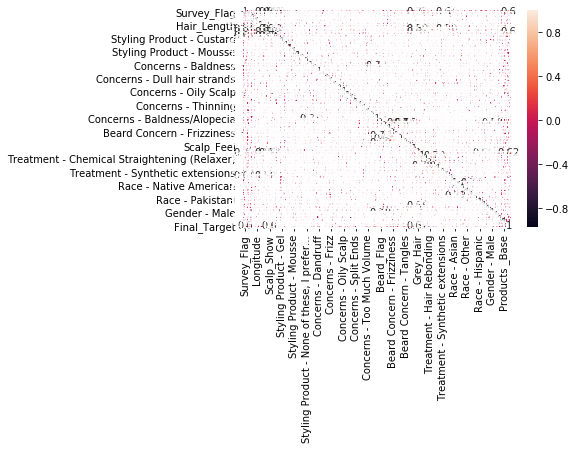

In [31]:
sns.heatmap(df_class.corr(),annot=True)
plt.show()

# Visualization

Plot for DURATION: total counts = 293


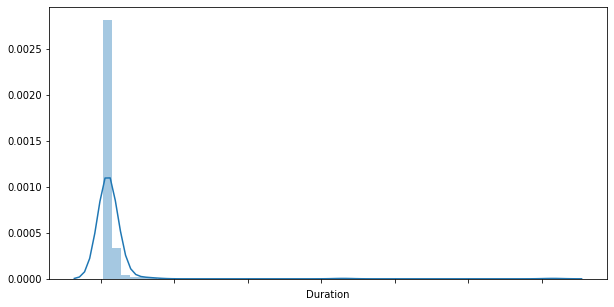

Plot for LONGITUDE: total counts = 293


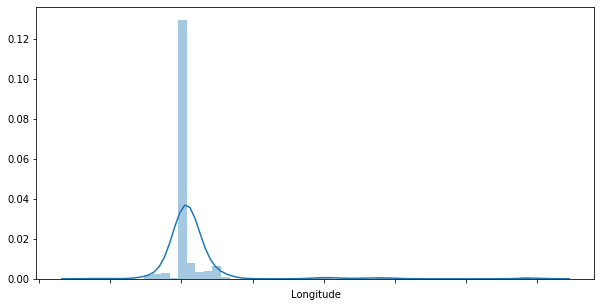

Plot for ZIPCODE: total counts = 293


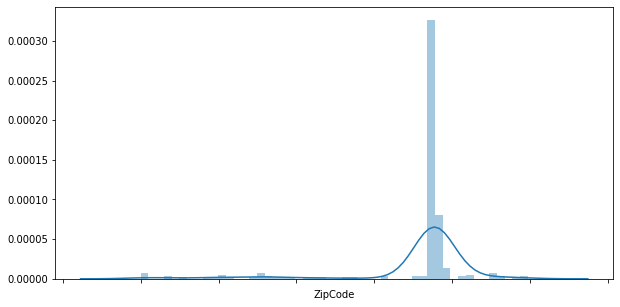

Plot for LATITUDE: total counts = 293


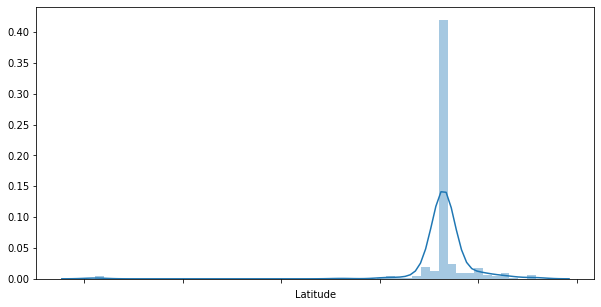

In [32]:
df_explore = df_class[['Duration','Longitude','ZipCode', 'Latitude']]
for cat in df_explore:
    cat_num = df_explore[cat]
    print("Plot for %s: total counts = %d" % (cat.upper(), len(cat_num)))
    f, ax = plt.subplots(figsize=(10,5))
    plot = sns.distplot(cat_num)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
    plt.show()

All need to transform

Text(0.5, 0, 'Hair type group')

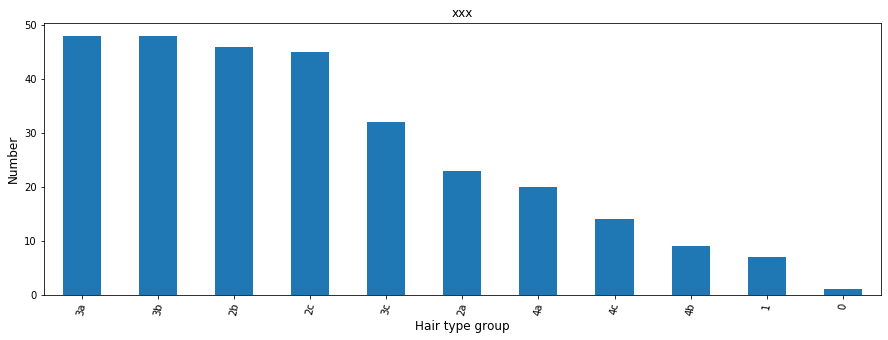

In [33]:
hairtype = df_class.HairType.value_counts()
hairtype.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Number', fontsize = 12)
plt.xlabel('Hair type group', fontsize = 12)

In [34]:
# Channel = df_class.Channel.value_counts()
# Channel.plot.bar(figsize = (15, 5), rot = 80)
# plt.title('xxx', fontsize = 12)
# plt.ylabel('Count', fontsize = 12)
# plt.xlabel('Distribution Channel group', fontsize = 12)

Text(0.5, 0, 'Hair type')

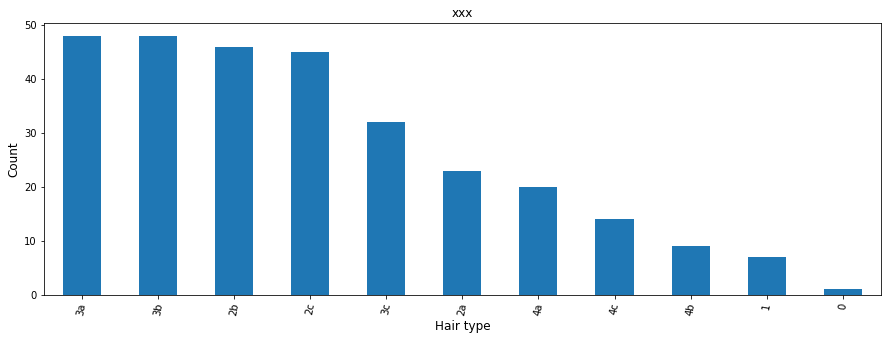

In [35]:
HairType = df_class.HairType.value_counts()
HairType.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Hair type', fontsize = 12)

Text(0.5, 0, 'Product Smell group')

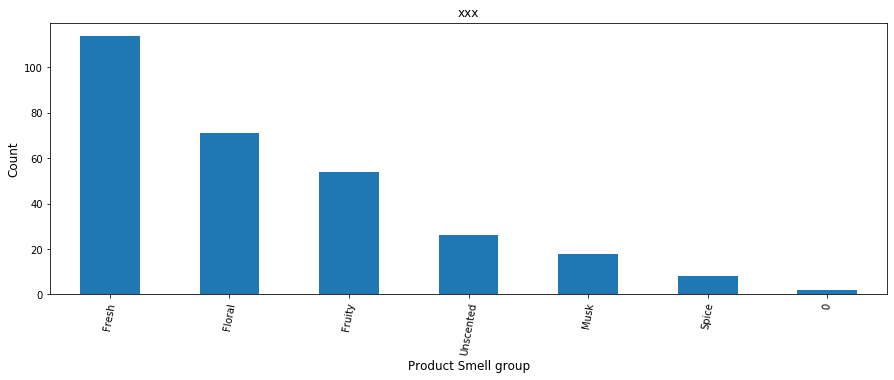

In [36]:
ProductSmell = df_class.ProductSmell.value_counts()
ProductSmell.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Product Smell group', fontsize = 12)

In [37]:

df_class['Hair_Flakes'] = df_class['Hair_Flakes'].astype('category')
df_class['Scalp_Show'] = df_class['Scalp_Show'].astype('category')
df_class['HairType'] = df_class['HairType'].astype('category')
df_class['Hair_Length'] = df_class['Hair_Length'].astype('category')
df_class['Hair_Thickness'] = df_class['Hair_Thickness'].astype('category')
df_class['ProductSmell'] = df_class['ProductSmell'].astype('category')
df_class['Grey_Hair'] = df_class['Grey_Hair'].astype('category')
df_class['Treatment_Freq'] = df_class['Treatment_Freq'].astype('category')
df_class['Age_Range'] = df_class['Age_Range'].astype('category')
df_class['Dry_Time'] = df_class['Dry_Time'].astype('category')
df_class['Products _Base'] = df_class['Products _Base'].astype('category')


In [38]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')

In [39]:
df_class['Longitude'] = qt.fit_transform(df_class[['Longitude']].values.reshape(-1,1))
df_class['Latitude'] = qt.fit_transform(df_class[['Latitude']].values.reshape(-1,1))
df_class['Duration'] = qt.fit_transform(df_class[['Duration']].values.reshape(-1,1))
df_class['ZipCode'] = qt.fit_transform(df_class[['ZipCode']].values.reshape(-1,1))

df_cluster['Longitude'] = qt.fit_transform(df_cluster[['Longitude']].values.reshape(-1,1))
df_cluster['Latitude'] = qt.fit_transform(df_cluster[['Latitude']].values.reshape(-1,1))
df_cluster['Duration'] = qt.fit_transform(df_cluster[['Duration']].values.reshape(-1,1))
df_cluster['ZipCode'] = qt.fit_transform(df_cluster[['ZipCode']].values.reshape(-1,1))

Plot for LONGITUDE: total counts = 293


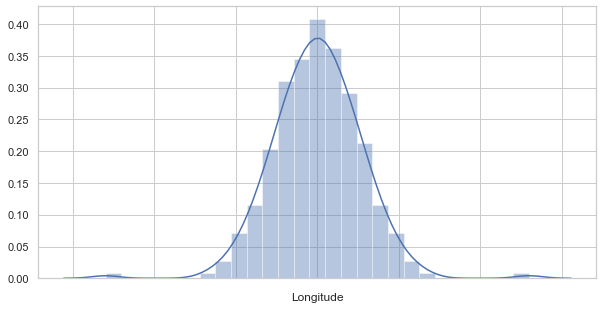

Plot for LATITUDE: total counts = 293


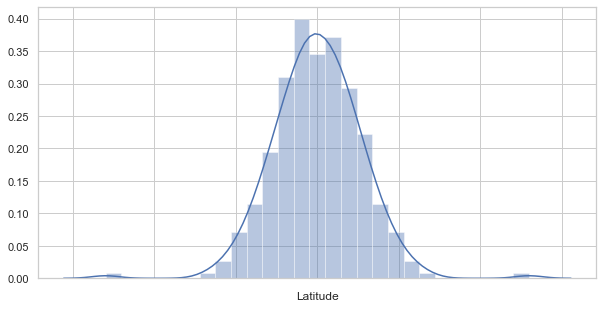

Plot for DURATION: total counts = 293


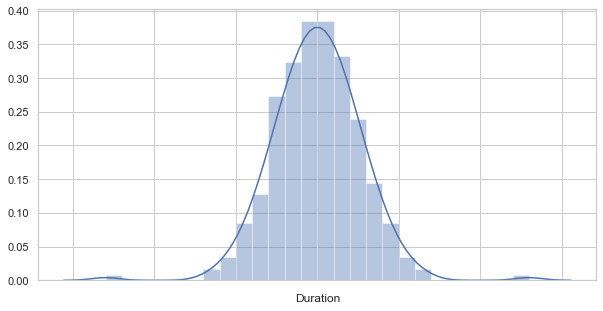

Plot for ZIPCODE: total counts = 293


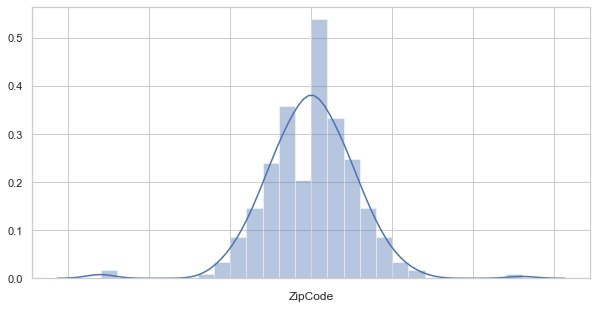

In [40]:
#import seaborn as sns
#import matplotlib.pyplot as plt
sns.set(style="whitegrid")

df_explore = df_class[['Longitude', 'Latitude', 'Duration', 'ZipCode']]
for cat in df_explore:
    cat_num = df_explore[cat]
    print("Plot for %s: total counts = %d" % (cat.upper(), len(cat_num)))
    f, ax = plt.subplots(figsize=(10,5))
    plot = sns.distplot(cat_num)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
    plt.show()

In [41]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 67 columns):
Survey_Flag                                     293 non-null int64
Duration                                        293 non-null float64
Latitude                                        293 non-null float64
Longitude                                       293 non-null float64
Hair_Length                                     293 non-null category
Dry_Time                                        293 non-null category
Scalp_Show                                      293 non-null category
Hair_Flakes                                     293 non-null category
HairType                                        293 non-null category
Styling Product - Custard                       293 non-null int64
Styling Product - Gel                           293 non-null int64
Styling Product - Hair Spray                    293 non-null int64
Styling Product - Hair Wax/Pomade               293 non-null int64
Sty

In [42]:
obj_cols = df_class.select_dtypes(include=['category']).columns
obj_cols

Index(['Hair_Length', 'Dry_Time', 'Scalp_Show', 'Hair_Flakes', 'HairType',
       'Hair_Thickness', 'Grey_Hair', 'Treatment_Freq', 'ProductSmell',
       'Age_Range', 'Products _Base'],
      dtype='object')

In [43]:
#df3 = df_class.iloc[:, [4, 5, 6, 7, 8, 42, 43, 50, 51, 60, 65]]

In [44]:
#df3.info()

In [45]:
#df1 = df_class.iloc[:, 1:4]
#df2 = df_class.iloc[:, 9:42]
#df4 = df_class.iloc[:, 44:50]
#df5 = df_class.iloc[:, 52:60]
#df6 = df_class.iloc[:, 61:65]
#df7 = df_class.iloc[:, 66]

In [46]:
#df_long = pd.concat([df1, df2, df4, df5, df6, df7], axis=1)
df_long = df_class.drop(df_class[obj_cols], axis=1)

In [47]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 56 columns):
Survey_Flag                                     293 non-null int64
Duration                                        293 non-null float64
Latitude                                        293 non-null float64
Longitude                                       293 non-null float64
Styling Product - Custard                       293 non-null int64
Styling Product - Gel                           293 non-null int64
Styling Product - Hair Spray                    293 non-null int64
Styling Product - Hair Wax/Pomade               293 non-null int64
Styling Product - Mousse                        293 non-null int64
Styling Product - Oil                           293 non-null int64
Styling Product - Styling Cream                 293 non-null int64
Styling Product - None of these, I prefer...    293 non-null int64
Concerns - Baldness                             293 non-null int64
Concerns - Breakag

# Type Conversion

In [48]:
# df['target'] = df['target'].map({'curly_High': 0,
#                                 'curly_Medium' : 1,
#                                 'curly_Low': 2,
#                                 'wavy_High': 3,
#                                 'wavy_Medium' : 4,
#                                 'wavy_Low' : 5, 
#                                 'coils_High': 6, 
#                                 'coils_Medium': 7,
#                                 'coils_Low': 8, 
#                                 'Straight_Medium': 9,
#                                 'Straight_low ': 10,
#                                }).astype(int)



In [49]:
# df['target'] = df['target'].astype(int, errors='ignore')

In [50]:
# df.info()

#### After transform

In [51]:
#from sklearn.preprocessing import StandardScaler
#std_scale =  StandardScaler()

In [52]:
#df['Duration'] = std_scale.fit_transform(df[['Duration']])
#df['Latitude'] = std_scale.fit_transform(df[['Latitude']])
#df['Longitude'] = std_scale.fit_transform(df[['Longitude']])
#df['ZipCode'] = std_scale.fit_transform(df[['ZipCode']])

###  One Hot Encoding with Pandas

In [53]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 56 columns):
Survey_Flag                                     293 non-null int64
Duration                                        293 non-null float64
Latitude                                        293 non-null float64
Longitude                                       293 non-null float64
Styling Product - Custard                       293 non-null int64
Styling Product - Gel                           293 non-null int64
Styling Product - Hair Spray                    293 non-null int64
Styling Product - Hair Wax/Pomade               293 non-null int64
Styling Product - Mousse                        293 non-null int64
Styling Product - Oil                           293 non-null int64
Styling Product - Styling Cream                 293 non-null int64
Styling Product - None of these, I prefer...    293 non-null int64
Concerns - Baldness                             293 non-null int64
Concerns - Breakag

In [54]:
df_long['Final_Target'] = df_long['Final_Target'].astype('int64')

In [55]:
df_dummies = pd.get_dummies(df_class[obj_cols])

In [56]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 67 columns):
Hair_Length_0.0           293 non-null uint8
Hair_Length_1.0           293 non-null uint8
Hair_Length_2.0           293 non-null uint8
Hair_Length_3.0           293 non-null uint8
Hair_Length_4.0           293 non-null uint8
Hair_Length_5.0           293 non-null uint8
Dry_Time_0.0              293 non-null uint8
Dry_Time_1.0              293 non-null uint8
Dry_Time_2.0              293 non-null uint8
Dry_Time_3.0              293 non-null uint8
Scalp_Show_0.0            293 non-null uint8
Scalp_Show_1.0            293 non-null uint8
Scalp_Show_2.0            293 non-null uint8
Scalp_Show_3.0            293 non-null uint8
Hair_Flakes_0.0           293 non-null uint8
Hair_Flakes_1.0           293 non-null uint8
Hair_Flakes_2.0           293 non-null uint8
Hair_Flakes_3.0           293 non-null uint8
Hair_Flakes_4.0           293 non-null uint8
HairType_0                293 non-null u

In [57]:
df_long = pd.concat([df_long, df_dummies], axis=1)

In [58]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Columns: 123 entries, Survey_Flag to Products _Base_4.0
dtypes: float64(4), int64(52), uint8(67)
memory usage: 147.4 KB


In [59]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 66 columns):
Survey_Flag                                     293 non-null int64
Duration                                        293 non-null float64
Latitude                                        293 non-null float64
Longitude                                       293 non-null float64
Hair_Length                                     293 non-null float64
Dry_Time                                        293 non-null float64
Scalp_Show                                      293 non-null float64
Hair_Flakes                                     293 non-null float64
HairType                                        293 non-null object
Styling Product - Custard                       293 non-null int64
Styling Product - Gel                           293 non-null int64
Styling Product - Hair Spray                    293 non-null int64
Styling Product - Hair Wax/Pomade               293 non-null int64
Styling P

In [60]:
df_dummies_cluster = pd.get_dummies(df_cluster[['HairType','ProductSmell']])

In [61]:
df_dummies_cluster

,HairType_0,HairType_1,HairType_2a,HairType_2b,HairType_2c,HairType_3a,HairType_3b,HairType_3c,HairType_4a,HairType_4b,HairType_4c,ProductSmell_0,ProductSmell_Floral,ProductSmell_Fresh,ProductSmell_Fruity,ProductSmell_Musk,ProductSmell_Spice,ProductSmell_Unscented
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
8,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [62]:
df_long_cluster = pd.concat([df_cluster, df_dummies_cluster], axis=1)
df_long_cluster.head()

,Survey_Flag,Duration,Latitude,Longitude,Hair_Length,Dry_Time,Scalp_Show,Hair_Flakes,HairType,Styling Product - Custard,Styling Product - Gel,Styling Product - Hair Spray,Styling Product - Hair Wax/Pomade,Styling Product - Mousse,Styling Product - Oil,Styling Product - Styling Cream,"Styling Product - None of these, I prefer...",Concerns - Baldness,Concerns - Breakage,Concerns - Dandruff,Concerns - Dry Scalp,Concerns - Dull hair strands,Concerns - Frizz,Concerns - Chemical and Heat Damage,Concerns - Hair Growth,Concerns - Oily Scalp,Concerns - Other,Concerns - Rough/Dry Hair,Concerns - Split Ends,Concerns - Thinning,Concerns - Too Little Volume,Concerns - Too Much Volume,Concerns - Pregnancy Related Thinning,Concerns - Baldness/Alopecia,Beard_Flag,Beard Concern - Brittle/Weak hair,Beard Concern - Dry/Flaky Skin Under Beard,Beard Concern - Frizziness,Beard Concern - Growth,Beard Concern - Itchiness,Beard Concern - Tangles,Scalp_Feel,Hair_Thickness,Grey_Hair,Hair_Treatment_Flag,Treatment - Chemical Straightening (Relaxer),Treatment - Hair Rebonding,Treatment - Keratin Treatment,Treatment - Natural extensions,Treatment - Synthetic extensions,Treatment_Freq,ProductSmell,Race - Middle Eastearn,Race - Asian,Race - Native American,Race - African American,Race - Other,Race - South Asian,Race - Pakistani,Race - Hispanic,Age_Range,Gender - Female,Gender - Male,Gender - Other,ZipCode,Products _Base,HairType_0,HairType_1,HairType_2a,HairType_2b,HairType_2c,HairType_3a,HairType_3b,HairType_3c,HairType_4a,HairType_4b,HairType_4c,ProductSmell_0,ProductSmell_Floral,ProductSmell_Fresh,ProductSmell_Fruity,ProductSmell_Musk,ProductSmell_Spice,ProductSmell_Unscented
0,1,-0.225079,-0.890332,-0.382548,5.0,2.0,2.0,2.0,3a,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,0,0,0,0,0,0,1.0,Fruity,1,0,0,0,0,0,0,0,2.0,1,0,0,-0.476720,3.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,1,-0.278248,0.142119,-0.264888,3.0,1.0,3.0,1.0,2b,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,3.0,1.0,1,1,0,0,0,0,2.0,Floral,1,0,0,0,0,0,0,0,2.0,1,0,0,-0.332216,2.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,1.346683,0.225079,-0.481534,5.0,2.0,3.0,4.0,3b,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,0,0,0,0,0,0,3.0,Floral,1,0,0,0,0,0,0,0,2.0,1,0,0,-0.332216,3.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,1,0.012877,-1.368253,-1.461656,4.0,2.0,3.0,2.0,3c,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,3.0,1.0,1,0,0,1,0,0,4.0,Fruity,1,0,0,0,0,0,0,0,2.0,1,0,0,1.210656,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,1,-1.078475,0.332216,-0.642501,5.0,2.0,2.0,3.0,3c,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,0,0,0,0,0,0,1.0,Fruity,1,0,0,0,0,0,0,0,2.0,1,0,0,-1.011779,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [63]:
df_long_cluster = df_long_cluster.drop(['HairType','ProductSmell'], axis=1)
df_long_cluster.head()

,Survey_Flag,Duration,Latitude,Longitude,Hair_Length,Dry_Time,Scalp_Show,Hair_Flakes,Styling Product - Custard,Styling Product - Gel,Styling Product - Hair Spray,Styling Product - Hair Wax/Pomade,Styling Product - Mousse,Styling Product - Oil,Styling Product - Styling Cream,"Styling Product - None of these, I prefer...",Concerns - Baldness,Concerns - Breakage,Concerns - Dandruff,Concerns - Dry Scalp,Concerns - Dull hair strands,Concerns - Frizz,Concerns - Chemical and Heat Damage,Concerns - Hair Growth,Concerns - Oily Scalp,Concerns - Other,Concerns - Rough/Dry Hair,Concerns - Split Ends,Concerns - Thinning,Concerns - Too Little Volume,Concerns - Too Much Volume,Concerns - Pregnancy Related Thinning,Concerns - Baldness/Alopecia,Beard_Flag,Beard Concern - Brittle/Weak hair,Beard Concern - Dry/Flaky Skin Under Beard,Beard Concern - Frizziness,Beard Concern - Growth,Beard Concern - Itchiness,Beard Concern - Tangles,Scalp_Feel,Hair_Thickness,Grey_Hair,Hair_Treatment_Flag,Treatment - Chemical Straightening (Relaxer),Treatment - Hair Rebonding,Treatment - Keratin Treatment,Treatment - Natural extensions,Treatment - Synthetic extensions,Treatment_Freq,Race - Middle Eastearn,Race - Asian,Race - Native American,Race - African American,Race - Other,Race - South Asian,Race - Pakistani,Race - Hispanic,Age_Range,Gender - Female,Gender - Male,Gender - Other,ZipCode,Products _Base,HairType_0,HairType_1,HairType_2a,HairType_2b,HairType_2c,HairType_3a,HairType_3b,HairType_3c,HairType_4a,HairType_4b,HairType_4c,ProductSmell_0,ProductSmell_Floral,ProductSmell_Fresh,ProductSmell_Fruity,ProductSmell_Musk,ProductSmell_Spice,ProductSmell_Unscented
0,1,-0.225079,-0.890332,-0.382548,5.0,2.0,2.0,2.0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,0,0,0,0,0,0,1.0,1,0,0,0,0,0,0,0,2.0,1,0,0,-0.476720,3.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,1,-0.278248,0.142119,-0.264888,3.0,1.0,3.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,3.0,1.0,1,1,0,0,0,0,2.0,1,0,0,0,0,0,0,0,2.0,1,0,0,-0.332216,2.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,1.346683,0.225079,-0.481534,5.0,2.0,3.0,4.0,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,0,0,0,0,0,0,3.0,1,0,0,0,0,0,0,0,2.0,1,0,0,-0.332216,3.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,1,0.012877,-1.368253,-1.461656,4.0,2.0,3.0,2.0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,3.0,1.0,1,0,0,1,0,0,4.0,1,0,0,0,0,0,0,0,2.0,1,0,0,1.210656,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,1,-1.078475,0.332216,-0.642501,5.0,2.0,2.0,3.0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,0,0,0,0,0,0,1.0,1,0,0,0,0,0,0,0,2.0,1,0,0,-1.011779,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [64]:
data = df_long

# Building Machine Learning

# Classification

In [65]:
# check version number
import imblearn
print(imblearn.__version__)
from collections import Counter
from imblearn.over_sampling import SMOTE

0.8.0


In [66]:
#df_long['Final_Target'].unique()

In [67]:
X = df_long.drop("Final_Target", axis=1)
y = df_long["Final_Target"]

In [68]:
#### Option - Upate to use records with no target as hold out or validation records ####

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 42, stratify=y) # 70% training and 30% test

In [70]:
print(len(set(y)))
print(len(set(y_train)))
print(len(set(y_test)))

12
12
12


In [71]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)


In [72]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(205, 122)
(88, 122)
(205,)
(88,)


#### 1. KNN

#### Use knn.score() to see the accuracy

In [73]:
knn_clf = KNeighborsClassifier(n_neighbors = 7 , metric='minkowski' , p=2)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [74]:
y_pred = knn_clf.predict(X_test)

In [75]:
acc_clf = knn_clf.score(X_train,y_train)
print(round(acc_clf*100, 2), "%")

79.02 %


In [76]:
# try K=1 through K=30 and record testing accuracy
k_range = range(1, 31)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

print(scores)

[0.6477272727272727, 0.6363636363636364, 0.6931818181818182, 0.7386363636363636, 0.6931818181818182, 0.6931818181818182, 0.7386363636363636, 0.7159090909090909, 0.7045454545454546, 0.7159090909090909, 0.6818181818181818, 0.7159090909090909, 0.7272727272727273, 0.7159090909090909, 0.7272727272727273, 0.7272727272727273, 0.7159090909090909, 0.6818181818181818, 0.6931818181818182, 0.7386363636363636, 0.7386363636363636, 0.7045454545454546, 0.7272727272727273, 0.7272727272727273, 0.7159090909090909, 0.7045454545454546, 0.7045454545454546, 0.6931818181818182, 0.6818181818181818, 0.6704545454545454]


Text(0, 0.5, 'Testing Accuracy')

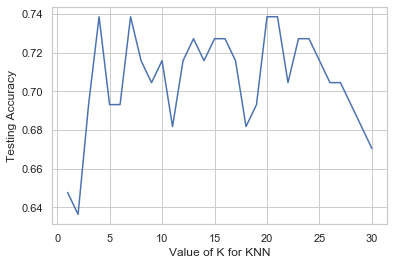

In [77]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

#### Cross -Validation for Classification

In [78]:
# import k-folder
from sklearn.model_selection import cross_val_score

# use the same model as before
knn_clf = KNeighborsClassifier(n_neighbors = 7)

In [79]:
# X,y will automatically devided by 5 folder, the scoring I will still use the accuracy
scores = cross_val_score(knn_clf, X, y, cv=5, scoring='accuracy')

In [80]:
# print all 5 times scores 
print(scores)

[0.6440678  0.6779661  0.74576271 0.82758621 0.77586207]


In [81]:
# then I will do the average about these five scores to get more accuracy score.
print(scores.mean())

0.7342489772063121


# we could choose different neighbors to see which K is the best K.

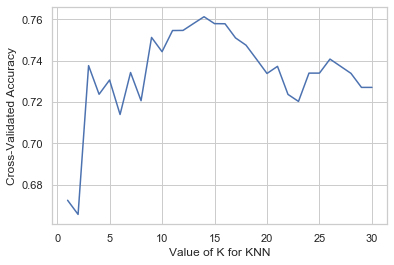

In [82]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [83]:
knn_clf_14 = KNeighborsClassifier(n_neighbors = 14)
knn_clf_14.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [84]:
y_pred_14 = knn_clf_14.predict(X_test)

In [85]:
result = confusion_matrix(y_test, y_pred_14)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_14)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test, y_pred_14)
print("Accuracy:", result2)

Confusion Matrix:
[[23  1  0  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 11  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  3  2  4  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  5  0  0  0  0  0  0]
 [ 0  1  2  0  0  0  2  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.50      1.00      0.67        14
           2       0.69      0.92      0.79        12
           3       0.38      0.30      0.33        10
           4       1.00      0.44      0.62         9
           5       1.00      0.71      0.83         7
           6       0.67      0.40      0.50         5
           7       1.00      0.33      0.50         3
   

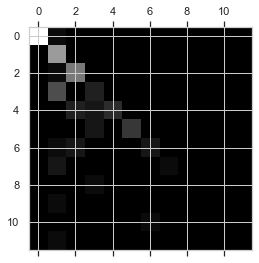

In [86]:
plt.matshow(result, cmap = plt.cm.gray)
plt.show()

In [87]:
row_sums = result.sum(axis = 1, keepdims = True)
# normalizing
norm_result = result / row_sums
np.fill_diagonal(norm_result, 0)

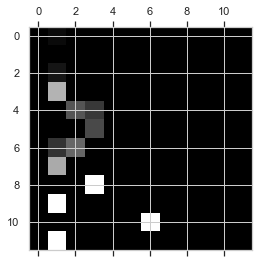

In [88]:
plt.matshow(norm_result, cmap = plt.cm.gray)
plt.show()

### 3. XGBoost Classifier

In [89]:
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
xgbC = XGBClassifier()

import xgboost as xgb

from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss, accuracy_score

In [90]:
#Special Matrices for XGBoost
xgtrain = xgb.DMatrix(X_train.values, y_train.values)
xgtest = xgb.DMatrix(X_test.values, y_test.values)

In [91]:
train_x = X_train.values
test_x = X_test.values
train_y = y_train
test_y = y_test

#DataFlair - Train the model

xgbC.fit(train_x,train_y)

# DataFlair - Calculate the accuracy
y_pred = xgbC.predict(test_x)
print(accuracy_score(test_y, y_pred)*100)

97.72727272727273


In [92]:
### Another method for XGBoost ###

In [94]:
#Building Base Model

# XGBoost params:
xgboost_params = { 
   "objective": "multi:softmax",
   "booster": "gbtree",
   "eval_metric": "mlogloss",
    "num_class": 12,
   "eta": 0.03, #learning rate ---tune everything below--
   "subsample": 1, #can help increase power
   "colsample_bytree": 1,
    "max_depth": 11 #sqrt of # feats.
}

boost_round = 1000

clf = xgb.train(xgboost_params,xgtrain,num_boost_round=boost_round,verbose_eval=True,maximize=False, evals=[(xgtest, "Test")], early_stopping_rounds=10)

#https://stackoverflow.com/questions/57986259/multiclass-classification-with-xgboost-classifier
#https://medium.com/@fzammito/whats-considered-a-good-log-loss-in-machine-learning-a529d400632d

[0]	Test-mlogloss:2.34939
Will train until Test-mlogloss hasn't improved in 10 rounds.
[1]	Test-mlogloss:2.22984
[2]	Test-mlogloss:2.12121
[3]	Test-mlogloss:2.02315
[4]	Test-mlogloss:1.93389
[5]	Test-mlogloss:1.85209
[6]	Test-mlogloss:1.77683
[7]	Test-mlogloss:1.70689
[8]	Test-mlogloss:1.64203
[9]	Test-mlogloss:1.58122
[10]	Test-mlogloss:1.52445
[11]	Test-mlogloss:1.47087
[12]	Test-mlogloss:1.42058
[13]	Test-mlogloss:1.37286
[14]	Test-mlogloss:1.32788
[15]	Test-mlogloss:1.28503
[16]	Test-mlogloss:1.24449
[17]	Test-mlogloss:1.20573
[18]	Test-mlogloss:1.16875
[19]	Test-mlogloss:1.13369
[20]	Test-mlogloss:1.10000
[21]	Test-mlogloss:1.06795
[22]	Test-mlogloss:1.03698
[23]	Test-mlogloss:1.00690
[24]	Test-mlogloss:0.97789
[25]	Test-mlogloss:0.95019
[26]	Test-mlogloss:0.92319
[27]	Test-mlogloss:0.89741
[28]	Test-mlogloss:0.87243
[29]	Test-mlogloss:0.84858
[30]	Test-mlogloss:0.82538
[31]	Test-mlogloss:0.80305
[32]	Test-mlogloss:0.78175
[33]	Test-mlogloss:0.76115
[34]	Test-mlogloss:0.74110
[35]

[295]	Test-mlogloss:0.11253
[296]	Test-mlogloss:0.11254
[297]	Test-mlogloss:0.11252
[298]	Test-mlogloss:0.11251
[299]	Test-mlogloss:0.11245
[300]	Test-mlogloss:0.11247
[301]	Test-mlogloss:0.11245
[302]	Test-mlogloss:0.11243
[303]	Test-mlogloss:0.11246
[304]	Test-mlogloss:0.11242
[305]	Test-mlogloss:0.11243
[306]	Test-mlogloss:0.11243
[307]	Test-mlogloss:0.11243
[308]	Test-mlogloss:0.11241
[309]	Test-mlogloss:0.11237
[310]	Test-mlogloss:0.11237
[311]	Test-mlogloss:0.11237
[312]	Test-mlogloss:0.11233
[313]	Test-mlogloss:0.11237
[314]	Test-mlogloss:0.11237
[315]	Test-mlogloss:0.11238
[316]	Test-mlogloss:0.11234
[317]	Test-mlogloss:0.11234
[318]	Test-mlogloss:0.11235
[319]	Test-mlogloss:0.11231
[320]	Test-mlogloss:0.11232
[321]	Test-mlogloss:0.11232
[322]	Test-mlogloss:0.11229
[323]	Test-mlogloss:0.11230
[324]	Test-mlogloss:0.11232
[325]	Test-mlogloss:0.11230
[326]	Test-mlogloss:0.11229
[327]	Test-mlogloss:0.11231
[328]	Test-mlogloss:0.11228
[329]	Test-mlogloss:0.11229
[330]	Test-mlogloss:

In [95]:
print("Best Log-loss: {:.2f} with {} rounds".format(
                 clf.best_score,
                 clf.best_iteration+1))

Best Log-loss: 0.11 with 331 rounds


In [96]:
#Make prediction
test_preds = clf.predict(xgtest, ntree_limit=clf.best_iteration)

In [97]:
# evaluate predictions
predictions = [round(value) for value in test_preds]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.73%


In [98]:
test_preds

array([ 1.,  6.,  0.,  6.,  2.,  0.,  3.,  0.,  3.,  0.,  4.,  1.,  7.,
        2.,  3.,  2.,  3.,  3.,  3.,  3.,  1.,  0.,  5.,  0.,  0.,  0.,
        1.,  0.,  5.,  0.,  2.,  5.,  5.,  4.,  1.,  0.,  5.,  1.,  0.,
        2.,  2.,  4.,  9.,  0.,  1.,  4.,  3.,  0.,  1.,  1.,  4.,  0.,
        2.,  9.,  3.,  0.,  0.,  2.,  6.,  1.,  4.,  0.,  1.,  5.,  0.,
        8.,  0.,  2.,  6.,  0.,  1.,  2.,  6.,  5.,  2.,  7.,  4.,  4.,
       10.,  2.,  3.,  4.,  7.,  1.,  1.,  2.,  0.,  0.], dtype=float32)

In [99]:
#need to do cv classifier
print ('Start cross validation')
cv_results = xgb.cv(xgboost_params, xgtrain, num_boost_round=boost_round, nfold=5, metrics = "mlogloss", early_stopping_rounds=10, seed=110)
print(cv_results)

Start cross validation
     train-mlogloss-mean  train-mlogloss-std  test-mlogloss-mean  \
0               2.353113            0.001739            2.360950   
1               2.235860            0.003178            2.250713   
2               2.130401            0.004400            2.151594   
3               2.034364            0.005218            2.061272   
4               1.946210            0.005635            1.978592   
5               1.864400            0.005893            1.902266   
6               1.788356            0.005902            1.830203   
7               1.717709            0.005935            1.763193   
8               1.651787            0.005970            1.700646   
9               1.590056            0.006008            1.642104   
10              1.532046            0.006018            1.586719   
11              1.477339            0.006128            1.534848   
12              1.425455            0.005979            1.483750   
13              1.376358 

In [100]:
cv_results['test-mlogloss-mean'].min()

0.13330039999999999

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

#Hyperparameter Tuning
gridsearch_params1 = {'eta': [0.01,0.03,0.05],
                      'subsample': [0.3,0.5,0.7]}
gridsearch_params1

gsearch1 = GridSearchCV(estimator = XGBClassifier(n_estimators=331,seed=110), param_grid = gridsearch_params1, scoring='accuracy', n_jobs=4, cv=3)
gsearch1.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=331, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=110,
                                     subsample=None, tree_me

In [102]:
#list(X_train.columns)

In [103]:
print(gsearch1.best_score_)
print(gsearch1.best_params_)

0.9756322818982666
{'eta': 0.05, 'subsample': 0.7}


In [104]:
#tuning more parameters
gridsearch_params2 = {'colsample_bytree': [0.3,0.5,1],
               'max_depth': [9, 10, 12, 13]}
gridsearch_params2

gsearch2 = GridSearchCV(estimator = XGBClassifier(n_estimators=331,seed=110, eta=0.5,subsample=0.7), param_grid = gridsearch_params2, scoring='accuracy',n_jobs=4, cv=3)
gsearch2.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, eta=0.5, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=331, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=110,
                                     subsample=0.7,

In [105]:
print(gsearch2.best_score_)
print(gsearch2.best_params_)

0.960997442455243
{'colsample_bytree': 1, 'max_depth': 9}


In [106]:
#tuning more parameters
gridsearch_params3 = {'max_depth': [3,5,9,11]}
gridsearch_params3

gsearch3 = GridSearchCV(estimator = XGBClassifier(n_estimators=331,seed=110, eta=0.5,subsample=0.7,colsample_bytree=1), param_grid = gridsearch_params3, scoring='accuracy',n_jobs=4, cv=3)
gsearch3.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None, colsample_bytree=1,
                                     eta=0.5, gamma=None, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=331, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=110,
                                     subsample=0.7, tr

In [107]:
print(gsearch3.best_score_)
print(gsearch3.best_params_)

0.960997442455243
{'max_depth': 3}


In [108]:
xgboost_final_params = { 
   "objective": "multi:softmax",
   "booster": "gbtree",
   "eval_metric": "mlogloss",
    "num_class": 12,
   "eta": 0.05, #learning rate ---tune everything below--
   "subsample": 0.7, #can help increase power
   "colsample_bytree": 1, 
   "max_depth": 3
}

xgbmodel = xgb.train(
    xgboost_final_params,
    xgtrain,
    num_boost_round=boost_round,
    evals=[(xgtest, "Test")],
    early_stopping_rounds=10)

print("Best logloss: {:.2f} in {} rounds".format(xgbmodel.best_score, xgbmodel.best_iteration+1))

#learning rate increased so don't need as many trees to get same level of improvement

[0]	Test-mlogloss:2.27870
Will train until Test-mlogloss hasn't improved in 10 rounds.
[1]	Test-mlogloss:2.10748
[2]	Test-mlogloss:1.96245
[3]	Test-mlogloss:1.83569
[4]	Test-mlogloss:1.72120
[5]	Test-mlogloss:1.62282
[6]	Test-mlogloss:1.53163
[7]	Test-mlogloss:1.44638
[8]	Test-mlogloss:1.36995
[9]	Test-mlogloss:1.29928
[10]	Test-mlogloss:1.23503
[11]	Test-mlogloss:1.17532
[12]	Test-mlogloss:1.12048
[13]	Test-mlogloss:1.06915
[14]	Test-mlogloss:1.02136
[15]	Test-mlogloss:0.97563
[16]	Test-mlogloss:0.93542
[17]	Test-mlogloss:0.89647
[18]	Test-mlogloss:0.85961
[19]	Test-mlogloss:0.82569
[20]	Test-mlogloss:0.79143
[21]	Test-mlogloss:0.75998
[22]	Test-mlogloss:0.73049
[23]	Test-mlogloss:0.70286
[24]	Test-mlogloss:0.67646
[25]	Test-mlogloss:0.65179
[26]	Test-mlogloss:0.62756
[27]	Test-mlogloss:0.60448
[28]	Test-mlogloss:0.58385
[29]	Test-mlogloss:0.56419
[30]	Test-mlogloss:0.54520
[31]	Test-mlogloss:0.52630
[32]	Test-mlogloss:0.50979
[33]	Test-mlogloss:0.49286
[34]	Test-mlogloss:0.47770
[35]

In [109]:
#Make predictions
print('Out of Fold Prediction:')
xgb_preds = xgbmodel.predict(xgtest, ntree_limit=xgbmodel.best_iteration)
# Save results

#Evaluate predictions
xgb_final_preds = [round(value) for value in xgb_preds]
xgb_final_acc = accuracy_score(y_test, xgb_final_preds)
print("Accuracy: %.2f%%" % (xgb_final_acc * 100.0))

#xgb_final_logloss = log_loss(y_test,xgb_preds)
#print("Log-loss: ", xgb_final_logloss)

#marginal improvement

Out of Fold Prediction:
Accuracy: 97.73%


In [110]:
#y_pred

In [111]:
xgb_results = confusion_matrix(y_test, xgb_preds)
print("Confusion Matrix:")
print(xgb_results)
xgb_results1 = classification_report(y_test, xgb_preds)
print("Classification Report:",)
print (xgb_results1)
xgb_results2 = accuracy_score(y_test, xgb_preds)
print("Accuracy:", xgb_results2)

Confusion Matrix:
[[23  0  1  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       1.00      1.00      1.00        14
           2       0.92      1.00      0.96        12
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         3
   

In [112]:
xgb_importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(xgbC.feature_importances_, 3)})
xgb_importances = xgb_importances.sort_values('importance',ascending=False).set_index('feature')

In [113]:
xgb_values = xgb_importances.head(15)

In [114]:
print(xgb_values)

                    importance
feature                       
Dry_Time_0.0             0.316
Products _Base_3.0       0.100
Products _Base_2.0       0.090
Dry_Time_2.0             0.089
Dry_Time_3.0             0.086
Products _Base_4.0       0.074
Dry_Time_1.0             0.065
Hair_Length_5.0          0.025
HairType_1               0.025
HairType_4c              0.025
Age_Range_6.0            0.023
Grey_Hair_4.0            0.014
ProductSmell_Musk        0.011
Hair_Length_1.0          0.009
Gender - Male            0.009


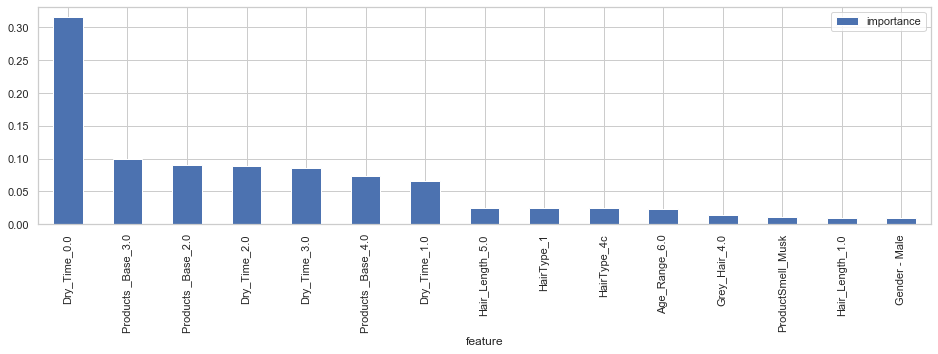

In [115]:
xgb_values.plot.bar(figsize=(16,4))

### 2. Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import  f1_score

In [117]:
# Create a random forest Classifier. 
rf_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)

In [118]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, random_state=42)

In [119]:
#rf_clf.fit(train_x,train_y)

In [120]:
y_pred_rf = rf_clf.predict(X_test)

In [121]:
#Evaluate predictions
y_pred_rf = [round(value) for value in y_pred_rf]
rf_acc = accuracy_score(y_test, y_pred_rf)
print("Accuracy: %.2f%%" % (rf_acc * 100.0))

Accuracy: 95.45%


In [122]:
# evaluate the model with cv
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=110)
n_scores = cross_val_score(rf_clf, X_train,y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print(n_scores)

[0.97560976 0.97560976 0.95121951 0.97560976 0.95121951 0.97560976
 0.97560976 0.95121951 0.97560976 0.95121951 1.         0.97560976
 0.95121951 0.97560976 0.95121951]


In [123]:
#Tuning Random Forest
param_grid = {
    #'n_estimators': [100,300,500], # number of trees in random forest -- the more the better, but stick with 100 to increase speed
    'criterion': ['gini', 'entropy'], # number of features at every split
    'max_depth': [5,15,30], # max depth
    'min_samples_split': np.linspace(0.1, 1.0, 3, endpoint=True) #vary the parameter from 10% to 100% of the samples #[2, 25, 50],# min samples req to split
    }

# Instantiate the grid search model
rf_grid_search = GridSearchCV(estimator = rf_clf, param_grid = param_grid, 
                          cv = 3, scoring='accuracy',n_jobs=-1, verbose = 2)

In [124]:
np.linspace(0.1, 1.0, 3, endpoint=True)

array([0.1 , 0.55, 1.  ])

In [125]:
# Fit the grid search to the data
rf_grid_search.fit(X_train,y_train)
rf_grid_search.best_params_


Fitting 3 folds for each of 18 candidates, totalling 54 fits


{'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 0.1}

In [126]:
print(rf_grid_search.best_score_)

0.936558681443592


In [127]:
#Final Model
rf_final_clf = RandomForestClassifier(n_jobs=-1, max_depth= 15, criterion= 'entropy', min_samples_split = 0.1, random_state=110)
rf_final_clf.fit(X_train,y_train)
rf_final_pred=rf_final_clf.predict(X_test)

In [128]:
#Evaluate predictions
rf_final_preds = [round(value) for value in rf_final_pred]
rf_final_acc = accuracy_score(y_test, rf_final_preds)
print("Accuracy: %.2f%%" % (rf_final_acc * 100.0))

Accuracy: 93.18%


In [129]:
rf_results = confusion_matrix(y_test, rf_final_preds)
print("Confusion Matrix:")
print(rf_results)

rf_results1 = classification_report(y_test, rf_final_preds)
print("Classification Report:",)
print (rf_results1)

rf_results2 = accuracy_score(y_test, rf_final_preds)
print("Accuracy:", rf_results2)

Confusion Matrix:
[[23  1  0  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.82      1.00      0.90        14
           2       1.00      1.00      1.00        12
           3       0.91      1.00      0.95        10
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         7
           6       0.71      1.00      0.83         5
           7       1.00      0.67      0.80         3
   

### Feature Importance

In [130]:
rf_importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf_final_clf.feature_importances_, 3)})
rf_importances = rf_importances.sort_values('importance',ascending=False).set_index('feature')

In [131]:
values = rf_importances.head(15)
values

,importance
feature,
Dry_Time_2.0,0.122
Products _Base_2.0,0.105
Products _Base_3.0,0.075
Dry_Time_3.0,0.074
Grey_Hair_0.0,0.063
Dry_Time_0.0,0.051
Scalp_Show_0.0,0.050
Products _Base_4.0,0.046
Treatment_Freq_0.0,0.043


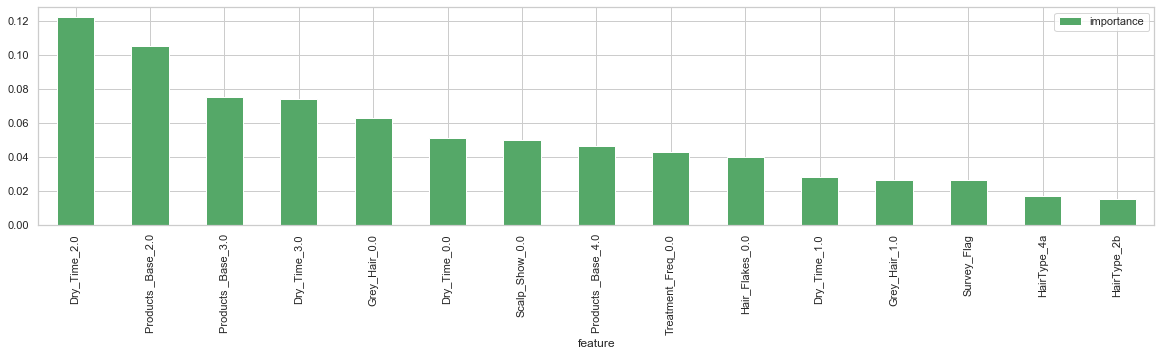

In [132]:
values.plot.bar(figsize=(20,4), color = "g")

# Clustering

Clustering techniques apply when there is no class to be predicted but rather when the instances are to be divided into natural groups.
A cluster is often an area of density in the feature space where examples from the domain (observations or rows of data) are closer to the cluster than other clusters. The cluster may have a center (the centroid) that is a sample or a point feature space and may have a boundary or extent.

In [133]:
df_long_cluster.head()

,Survey_Flag,Duration,Latitude,Longitude,Hair_Length,Dry_Time,Scalp_Show,Hair_Flakes,Styling Product - Custard,Styling Product - Gel,Styling Product - Hair Spray,Styling Product - Hair Wax/Pomade,Styling Product - Mousse,Styling Product - Oil,Styling Product - Styling Cream,"Styling Product - None of these, I prefer...",Concerns - Baldness,Concerns - Breakage,Concerns - Dandruff,Concerns - Dry Scalp,Concerns - Dull hair strands,Concerns - Frizz,Concerns - Chemical and Heat Damage,Concerns - Hair Growth,Concerns - Oily Scalp,Concerns - Other,Concerns - Rough/Dry Hair,Concerns - Split Ends,Concerns - Thinning,Concerns - Too Little Volume,Concerns - Too Much Volume,Concerns - Pregnancy Related Thinning,Concerns - Baldness/Alopecia,Beard_Flag,Beard Concern - Brittle/Weak hair,Beard Concern - Dry/Flaky Skin Under Beard,Beard Concern - Frizziness,Beard Concern - Growth,Beard Concern - Itchiness,Beard Concern - Tangles,Scalp_Feel,Hair_Thickness,Grey_Hair,Hair_Treatment_Flag,Treatment - Chemical Straightening (Relaxer),Treatment - Hair Rebonding,Treatment - Keratin Treatment,Treatment - Natural extensions,Treatment - Synthetic extensions,Treatment_Freq,Race - Middle Eastearn,Race - Asian,Race - Native American,Race - African American,Race - Other,Race - South Asian,Race - Pakistani,Race - Hispanic,Age_Range,Gender - Female,Gender - Male,Gender - Other,ZipCode,Products _Base,HairType_0,HairType_1,HairType_2a,HairType_2b,HairType_2c,HairType_3a,HairType_3b,HairType_3c,HairType_4a,HairType_4b,HairType_4c,ProductSmell_0,ProductSmell_Floral,ProductSmell_Fresh,ProductSmell_Fruity,ProductSmell_Musk,ProductSmell_Spice,ProductSmell_Unscented
0,1,-0.225079,-0.890332,-0.382548,5.0,2.0,2.0,2.0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,0,0,0,0,0,0,1.0,1,0,0,0,0,0,0,0,2.0,1,0,0,-0.476720,3.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,1,-0.278248,0.142119,-0.264888,3.0,1.0,3.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,3.0,1.0,1,1,0,0,0,0,2.0,1,0,0,0,0,0,0,0,2.0,1,0,0,-0.332216,2.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,1.346683,0.225079,-0.481534,5.0,2.0,3.0,4.0,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,0,0,0,0,0,0,3.0,1,0,0,0,0,0,0,0,2.0,1,0,0,-0.332216,3.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,1,0.012877,-1.368253,-1.461656,4.0,2.0,3.0,2.0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,3.0,1.0,1,0,0,1,0,0,4.0,1,0,0,0,0,0,0,0,2.0,1,0,0,1.210656,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,1,-1.078475,0.332216,-0.642501,5.0,2.0,2.0,3.0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,0,0,0,0,0,0,1.0,1,0,0,0,0,0,0,0,2.0,1,0,0,-1.011779,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [134]:
from sklearn.decomposition import PCA

In [135]:
curly_pca = PCA(n_components=30)
curly_pca.fit(df_long_cluster)
test = curly_pca.transform(df_long_cluster)

In [136]:
curly_pca.explained_variance_ratio_

array([0.18223503, 0.11968928, 0.09979742, 0.06891834, 0.05702624,
       0.04351413, 0.04333493, 0.03805439, 0.03331046, 0.02705913,
       0.02302027, 0.0200801 , 0.01568417, 0.01507393, 0.01303406,
       0.011676  , 0.01111713, 0.01060232, 0.00946406, 0.00876214,
       0.00809322, 0.00795782, 0.00747037, 0.00722851, 0.00693631,
       0.00648001, 0.00614022, 0.00595099, 0.00546214, 0.00529402])

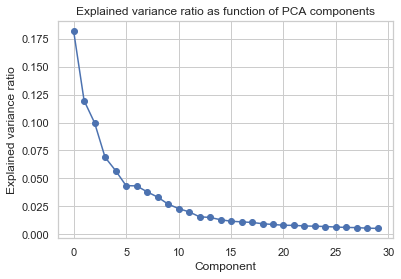

In [137]:
plt.plot(list(curly_pca.explained_variance_ratio_),'-o')
plt.title('Explained variance ratio as function of PCA components')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component')
plt.show()

In [138]:
reduction_pca = PCA(n_components=24)
reduced_features = reduction_pca.fit_transform(df_long_cluster)

# Clustering
### KMeans with PCA

In [139]:
import sklearn.cluster as cluster
from sklearn.cluster import KMeans

In [140]:
km = KMeans(n_clusters = 5)
clusters = km.fit(reduced_features)

In [141]:
clusters

KMeans(n_clusters=5)

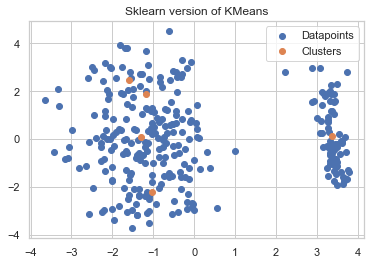

In [142]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], label='Datapoints')
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

In [143]:
reduced_features.shape

(293, 24)

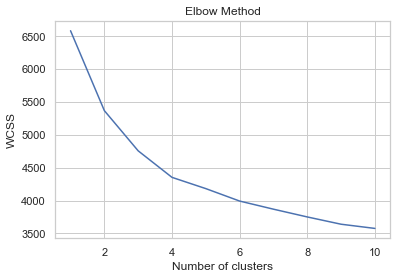

In [144]:
#Reference - https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

#finding best number of clusters
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

wcss = []
#within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=1994)
    kmeans.fit(reduced_features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [145]:
km_4 = KMeans(n_clusters = 4)
clusters_4 = km_4.fit(reduced_features)

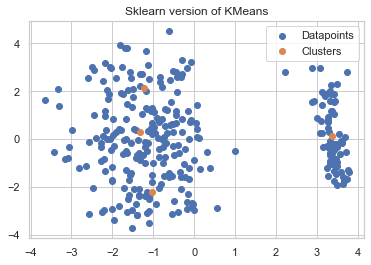

In [146]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], label='Datapoints')
plt.scatter(clusters_4.cluster_centers_[:, 0], clusters_4.cluster_centers_[:, 1], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

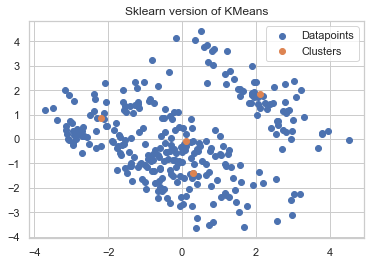

In [224]:
plt.scatter(reduced_features[:, 1], reduced_features[:, 2], label='Datapoints')
plt.scatter(clusters_4.cluster_centers_[:, 1], clusters_4.cluster_centers_[:, 2], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

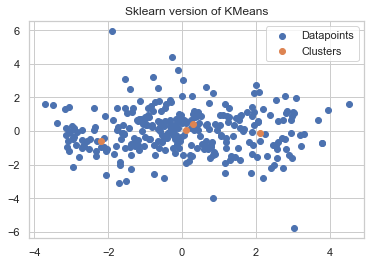

In [227]:
plt.scatter(reduced_features[:, 1], reduced_features[:, 3], label='Datapoints')
plt.scatter(clusters_4.cluster_centers_[:, 1], clusters_4.cluster_centers_[:, 3], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

In [147]:
clusters_4.cluster_centers_

array([[-1.33528983e+00,  2.96097463e-01, -1.38934995e+00,
         4.12877264e-01, -2.18595229e-01, -1.21773695e-02,
        -2.18944218e-02,  4.85501791e-02, -5.46861418e-02,
         7.11648908e-02,  2.25857868e-02, -7.11447324e-03,
        -6.17759470e-02, -1.25170401e-02,  1.28347251e-02,
         3.06041020e-02, -1.74096830e-02,  4.29387184e-03,
        -2.18254979e-02,  1.31390343e-02, -2.09948310e-02,
         3.21482237e-02,  3.69996154e-02, -2.20184251e-02],
       [-1.02864953e+00, -2.19582036e+00,  8.52282202e-01,
        -6.07890668e-01,  2.22687441e-01, -1.28087912e-01,
         1.98304743e-02, -2.42734909e-02,  1.08243468e-01,
         6.21114468e-02, -3.55696468e-02, -4.89161349e-02,
        -5.50698862e-02,  1.31458599e-03, -3.63270958e-02,
        -4.54838405e-02, -2.04773407e-02,  7.36561195e-02,
        -6.56218184e-02,  3.56469647e-02,  3.41298394e-02,
        -1.62120724e-02, -2.58547003e-03,  2.83941739e-02],
       [ 3.36417992e+00,  1.13347574e-01, -7.31907349e

In [148]:
#creating new cluster_group column in data frame for the labels

predict=km_4.predict(reduced_features)
df_long_cluster['pca_clusters'] = pd.Series(predict, index=df.index)

In [203]:
#adding clusters to original df
df['pca_clusters'] = pd.Series(predict, index=df.index)

In [149]:
df_long_cluster.head()

,Survey_Flag,Duration,Latitude,Longitude,Hair_Length,Dry_Time,Scalp_Show,Hair_Flakes,Styling Product - Custard,Styling Product - Gel,Styling Product - Hair Spray,Styling Product - Hair Wax/Pomade,Styling Product - Mousse,Styling Product - Oil,Styling Product - Styling Cream,"Styling Product - None of these, I prefer...",Concerns - Baldness,Concerns - Breakage,Concerns - Dandruff,Concerns - Dry Scalp,Concerns - Dull hair strands,Concerns - Frizz,Concerns - Chemical and Heat Damage,Concerns - Hair Growth,Concerns - Oily Scalp,Concerns - Other,Concerns - Rough/Dry Hair,Concerns - Split Ends,Concerns - Thinning,Concerns - Too Little Volume,Concerns - Too Much Volume,Concerns - Pregnancy Related Thinning,Concerns - Baldness/Alopecia,Beard_Flag,Beard Concern - Brittle/Weak hair,Beard Concern - Dry/Flaky Skin Under Beard,Beard Concern - Frizziness,Beard Concern - Growth,Beard Concern - Itchiness,Beard Concern - Tangles,Scalp_Feel,Hair_Thickness,Grey_Hair,Hair_Treatment_Flag,Treatment - Chemical Straightening (Relaxer),Treatment - Hair Rebonding,Treatment - Keratin Treatment,Treatment - Natural extensions,Treatment - Synthetic extensions,Treatment_Freq,Race - Middle Eastearn,Race - Asian,Race - Native American,Race - African American,Race - Other,Race - South Asian,Race - Pakistani,Race - Hispanic,Age_Range,Gender - Female,Gender - Male,Gender - Other,ZipCode,Products _Base,HairType_0,HairType_1,HairType_2a,HairType_2b,HairType_2c,HairType_3a,HairType_3b,HairType_3c,HairType_4a,HairType_4b,HairType_4c,ProductSmell_0,ProductSmell_Floral,ProductSmell_Fresh,ProductSmell_Fruity,ProductSmell_Musk,ProductSmell_Spice,ProductSmell_Unscented,pca_clusters
0,1,-0.225079,-0.890332,-0.382548,5.0,2.0,2.0,2.0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,0,0,0,0,0,0,1.0,1,0,0,0,0,0,0,0,2.0,1,0,0,-0.476720,3.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,-0.278248,0.142119,-0.264888,3.0,1.0,3.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,3.0,1.0,1,1,0,0,0,0,2.0,1,0,0,0,0,0,0,0,2.0,1,0,0,-0.332216,2.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,1.346683,0.225079,-0.481534,5.0,2.0,3.0,4.0,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,0,0,0,0,0,0,3.0,1,0,0,0,0,0,0,0,2.0,1,0,0,-0.332216,3.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,1,0.012877,-1.368253,-1.461656,4.0,2.0,3.0,2.0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,3.0,1.0,1,0,0,1,0,0,4.0,1,0,0,0,0,0,0,0,2.0,1,0,0,1.210656,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,1,-1.078475,0.332216,-0.642501,5.0,2.0,2.0,3.0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,0,0,0,0,0,0,1.0,1,0,0,0,0,0,0,0,2.0,1,0,0,-1.011779,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


In [150]:
survey_pca_groups_mn = df_long_cluster.groupby(['pca_clusters']).mean()
survey_pca_groups_mn

,Survey_Flag,Duration,Latitude,Longitude,Hair_Length,Dry_Time,Scalp_Show,Hair_Flakes,Styling Product - Custard,Styling Product - Gel,Styling Product - Hair Spray,Styling Product - Hair Wax/Pomade,Styling Product - Mousse,Styling Product - Oil,Styling Product - Styling Cream,"Styling Product - None of these, I prefer...",Concerns - Baldness,Concerns - Breakage,Concerns - Dandruff,Concerns - Dry Scalp,Concerns - Dull hair strands,Concerns - Frizz,Concerns - Chemical and Heat Damage,Concerns - Hair Growth,Concerns - Oily Scalp,Concerns - Other,Concerns - Rough/Dry Hair,Concerns - Split Ends,Concerns - Thinning,Concerns - Too Little Volume,Concerns - Too Much Volume,Concerns - Pregnancy Related Thinning,Concerns - Baldness/Alopecia,Beard_Flag,Beard Concern - Brittle/Weak hair,Beard Concern - Dry/Flaky Skin Under Beard,Beard Concern - Frizziness,Beard Concern - Growth,Beard Concern - Itchiness,Beard Concern - Tangles,Scalp_Feel,Hair_Thickness,Grey_Hair,Hair_Treatment_Flag,Treatment - Chemical Straightening (Relaxer),Treatment - Hair Rebonding,Treatment - Keratin Treatment,Treatment - Natural extensions,Treatment - Synthetic extensions,Treatment_Freq,Race - Middle Eastearn,Race - Asian,Race - Native American,Race - African American,Race - Other,Race - South Asian,Race - Pakistani,Race - Hispanic,Age_Range,Gender - Female,Gender - Male,Gender - Other,ZipCode,Products _Base,HairType_0,HairType_1,HairType_2a,HairType_2b,HairType_2c,HairType_3a,HairType_3b,HairType_3c,HairType_4a,HairType_4b,HairType_4c,ProductSmell_0,ProductSmell_Floral,ProductSmell_Fresh,ProductSmell_Fruity,ProductSmell_Musk,ProductSmell_Spice,ProductSmell_Unscented
pca_clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.980198,0.175803,-0.050801,-0.009377,3.891089,2.306931,2.237624,1.891089,0.128713,0.198020,0.148515,0.039604,0.257426,0.366337,0.554455,0.188119,0.049505,0.346535,0.217822,0.178218,0.207921,0.673267,0.198020,0.306931,0.217822,0.000000,0.287129,0.415842,0.316832,0.316832,0.069307,0.000000,0.049505,0.029703,0.000000,0.000000,0.009901,0.009901,0.019802,0.029703,2.504950,2.633663,1.316832,0.148515,0.049505,0.009901,0.108911,0.019802,0.009901,2.009901,0.267327,0.168317,0.019802,0.168317,0.059406,0.138614,0.000000,0.000000,2.504950,0.980198,0.019802,0.000000,0.133371,2.594059,0.000000,0.039604,0.089109,0.138614,0.217822,0.158416,0.148515,0.089109,0.089109,0.019802,0.009901,0.000000,0.247525,0.435644,0.207921,0.029703,0.000000,0.079208
1,1.000000,0.040204,0.181347,0.176093,4.076923,2.553846,1.800000,2.338462,0.153846,0.246154,0.092308,0.030769,0.138462,0.523077,0.723077,0.030769,0.015385,0.400000,0.384615,0.369231,0.215385,0.646154,0.138462,0.400000,0.092308,0.000000,0.600000,0.400000,0.200000,0.169231,0.076923,0.030769,0.015385,0.030769,0.015385,0.015385,0.000000,0.030769,0.000000,0.000000,2.200000,6.000000,1.169231,0.200000,0.030769,0.030769,0.123077,0.030769,0.030769,1.830769,0.415385,0.200000,0.015385,0.215385,0.076923,0.107692,0.000000,0.000000,2.215385,0.953846,0.030769,0.015385,-0.099363,2.769231,0.015385,0.000000,0.015385,0.184615,0.138462,0.153846,0.200000,0.138462,0.030769,0.061538,0.061538,0.015385,0.338462,0.307692,0.215385,0.046154,0.061538,0.015385
2,0.025641,-0.269262,-0.207654,-0.157420,3.423077,0.000000,0.000000,0.000000,0.141026,0.256410,0.153846,0.038462,0.153846,0.384615,0.525641,0.102564,0.115385,0.294872,0.294872,0.294872,0.000000,0.589744,0.179487,0.230769,0.000000,0.076923,0.000000,0.333333,0.269231,0.205128,0.089744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.025641,4.089744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.615385,0.141026,0.000000,0.153846,0.038462,0.012821,0.012821,0.064103,2.051282,0.769231,0.230769,0.000000,-0.042473,2.717949,0.000000,0.012821,0.076923,0.128205,0.141026,0.217949,0.166667,0.166667,0.038462,0.012821,0.038462,0.012821,0.217949,0.384615,0.166667,0.076923,0.051282,0.089744
3,1.000000,0.015850,0.194

In [151]:
survey_pca_groups_md = df_long_cluster.groupby(['pca_clusters']).median()
survey_pca_groups_md

,Survey_Flag,Duration,Latitude,Longitude,Hair_Length,Dry_Time,Scalp_Show,Hair_Flakes,Styling Product - Custard,Styling Product - Gel,Styling Product - Hair Spray,Styling Product - Hair Wax/Pomade,Styling Product - Mousse,Styling Product - Oil,Styling Product - Styling Cream,"Styling Product - None of these, I prefer...",Concerns - Baldness,Concerns - Breakage,Concerns - Dandruff,Concerns - Dry Scalp,Concerns - Dull hair strands,Concerns - Frizz,Concerns - Chemical and Heat Damage,Concerns - Hair Growth,Concerns - Oily Scalp,Concerns - Other,Concerns - Rough/Dry Hair,Concerns - Split Ends,Concerns - Thinning,Concerns - Too Little Volume,Concerns - Too Much Volume,Concerns - Pregnancy Related Thinning,Concerns - Baldness/Alopecia,Beard_Flag,Beard Concern - Brittle/Weak hair,Beard Concern - Dry/Flaky Skin Under Beard,Beard Concern - Frizziness,Beard Concern - Growth,Beard Concern - Itchiness,Beard Concern - Tangles,Scalp_Feel,Hair_Thickness,Grey_Hair,Hair_Treatment_Flag,Treatment - Chemical Straightening (Relaxer),Treatment - Hair Rebonding,Treatment - Keratin Treatment,Treatment - Natural extensions,Treatment - Synthetic extensions,Treatment_Freq,Race - Middle Eastearn,Race - Asian,Race - Native American,Race - African American,Race - Other,Race - South Asian,Race - Pakistani,Race - Hispanic,Age_Range,Gender - Female,Gender - Male,Gender - Other,ZipCode,Products _Base,HairType_0,HairType_1,HairType_2a,HairType_2b,HairType_2c,HairType_3a,HairType_3b,HairType_3c,HairType_4a,HairType_4b,HairType_4c,ProductSmell_0,ProductSmell_Floral,ProductSmell_Fresh,ProductSmell_Fruity,ProductSmell_Musk,ProductSmell_Spice,ProductSmell_Unscented
pca_clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0.198740,-0.150796,0.068729,4.0,2.0,2.0,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3.0,1.0,0,0,0,0,0,0,2.0,0,0,0,0,0,0,0,0,2.0,1,0,0,0.012877,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.047231,0.085949,0.229483,4.0,3.0,2.0,2.0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,0,0,0,0,0,0,2.0,0,0,0,0,0,0,0,0,2.0,1,0,0,0.012877,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,-0.357292,-0.060127,-0.443365,4.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4.0,0.0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,2.0,1,0,0,0.012877,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,-0.111829,0.467124,0.068729,1.0,2.0,3.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3.0,1.0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,2.0,1,0,0,0.012877,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [164]:
#adding counts
survey_pca_groups_md['Counts'] = pd.Series(df_long_cluster.groupby(['pca_clusters']).size())
survey_pca_groups_md

,Survey_Flag,Duration,Latitude,Longitude,Hair_Length,Dry_Time,Scalp_Show,Hair_Flakes,Styling Product - Custard,Styling Product - Gel,Styling Product - Hair Spray,Styling Product - Hair Wax/Pomade,Styling Product - Mousse,Styling Product - Oil,Styling Product - Styling Cream,"Styling Product - None of these, I prefer...",Concerns - Baldness,Concerns - Breakage,Concerns - Dandruff,Concerns - Dry Scalp,Concerns - Dull hair strands,Concerns - Frizz,Concerns - Chemical and Heat Damage,Concerns - Hair Growth,Concerns - Oily Scalp,Concerns - Other,Concerns - Rough/Dry Hair,Concerns - Split Ends,Concerns - Thinning,Concerns - Too Little Volume,Concerns - Too Much Volume,Concerns - Pregnancy Related Thinning,Concerns - Baldness/Alopecia,Beard_Flag,Beard Concern - Brittle/Weak hair,Beard Concern - Dry/Flaky Skin Under Beard,Beard Concern - Frizziness,Beard Concern - Growth,Beard Concern - Itchiness,Beard Concern - Tangles,Scalp_Feel,Hair_Thickness,Grey_Hair,Hair_Treatment_Flag,Treatment - Chemical Straightening (Relaxer),Treatment - Hair Rebonding,Treatment - Keratin Treatment,Treatment - Natural extensions,Treatment - Synthetic extensions,Treatment_Freq,Race - Middle Eastearn,Race - Asian,Race - Native American,Race - African American,Race - Other,Race - South Asian,Race - Pakistani,Race - Hispanic,Age_Range,Gender - Female,Gender - Male,Gender - Other,ZipCode,Products _Base,HairType_0,HairType_1,HairType_2a,HairType_2b,HairType_2c,HairType_3a,HairType_3b,HairType_3c,HairType_4a,HairType_4b,HairType_4c,ProductSmell_0,ProductSmell_Floral,ProductSmell_Fresh,ProductSmell_Fruity,ProductSmell_Musk,ProductSmell_Spice,ProductSmell_Unscented,Counts
pca_clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0.198740,-0.150796,0.068729,4.0,2.0,2.0,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3.0,1.0,0,0,0,0,0,0,2.0,0,0,0,0,0,0,0,0,2.0,1,0,0,0.012877,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,101
1,1,0.047231,0.085949,0.229483,4.0,3.0,2.0,2.0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,0,0,0,0,0,0,2.0,0,0,0,0,0,0,0,0,2.0,1,0,0,0.012877,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65
2,0,-0.357292,-0.060127,-0.443365,4.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4.0,0.0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,2.0,1,0,0,0.012877,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78
3,1,-0.111829,0.467124,0.068729,1.0,2.0,3.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3.0,1.0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,2.0,1,0,0,0.012877,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49


In [167]:
#adding counts
survey_pca_groups_mn['Counts'] = pd.Series(df_long_cluster.groupby(['pca_clusters']).size())
survey_pca_groups_mn

,Survey_Flag,Duration,Latitude,Longitude,Hair_Length,Dry_Time,Scalp_Show,Hair_Flakes,Styling Product - Custard,Styling Product - Gel,Styling Product - Hair Spray,Styling Product - Hair Wax/Pomade,Styling Product - Mousse,Styling Product - Oil,Styling Product - Styling Cream,"Styling Product - None of these, I prefer...",Concerns - Baldness,Concerns - Breakage,Concerns - Dandruff,Concerns - Dry Scalp,Concerns - Dull hair strands,Concerns - Frizz,Concerns - Chemical and Heat Damage,Concerns - Hair Growth,Concerns - Oily Scalp,Concerns - Other,Concerns - Rough/Dry Hair,Concerns - Split Ends,Concerns - Thinning,Concerns - Too Little Volume,Concerns - Too Much Volume,Concerns - Pregnancy Related Thinning,Concerns - Baldness/Alopecia,Beard_Flag,Beard Concern - Brittle/Weak hair,Beard Concern - Dry/Flaky Skin Under Beard,Beard Concern - Frizziness,Beard Concern - Growth,Beard Concern - Itchiness,Beard Concern - Tangles,Scalp_Feel,Hair_Thickness,Grey_Hair,Hair_Treatment_Flag,Treatment - Chemical Straightening (Relaxer),Treatment - Hair Rebonding,Treatment - Keratin Treatment,Treatment - Natural extensions,Treatment - Synthetic extensions,Treatment_Freq,Race - Middle Eastearn,Race - Asian,Race - Native American,Race - African American,Race - Other,Race - South Asian,Race - Pakistani,Race - Hispanic,Age_Range,Gender - Female,Gender - Male,Gender - Other,ZipCode,Products _Base,HairType_0,HairType_1,HairType_2a,HairType_2b,HairType_2c,HairType_3a,HairType_3b,HairType_3c,HairType_4a,HairType_4b,HairType_4c,ProductSmell_0,ProductSmell_Floral,ProductSmell_Fresh,ProductSmell_Fruity,ProductSmell_Musk,ProductSmell_Spice,ProductSmell_Unscented,Counts
pca_clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.980198,0.175803,-0.050801,-0.009377,3.891089,2.306931,2.237624,1.891089,0.128713,0.198020,0.148515,0.039604,0.257426,0.366337,0.554455,0.188119,0.049505,0.346535,0.217822,0.178218,0.207921,0.673267,0.198020,0.306931,0.217822,0.000000,0.287129,0.415842,0.316832,0.316832,0.069307,0.000000,0.049505,0.029703,0.000000,0.000000,0.009901,0.009901,0.019802,0.029703,2.504950,2.633663,1.316832,0.148515,0.049505,0.009901,0.108911,0.019802,0.009901,2.009901,0.267327,0.168317,0.019802,0.168317,0.059406,0.138614,0.000000,0.000000,2.504950,0.980198,0.019802,0.000000,0.133371,2.594059,0.000000,0.039604,0.089109,0.138614,0.217822,0.158416,0.148515,0.089109,0.089109,0.019802,0.009901,0.000000,0.247525,0.435644,0.207921,0.029703,0.000000,0.079208,101
1,1.000000,0.040204,0.181347,0.176093,4.076923,2.553846,1.800000,2.338462,0.153846,0.246154,0.092308,0.030769,0.138462,0.523077,0.723077,0.030769,0.015385,0.400000,0.384615,0.369231,0.215385,0.646154,0.138462,0.400000,0.092308,0.000000,0.600000,0.400000,0.200000,0.169231,0.076923,0.030769,0.015385,0.030769,0.015385,0.015385,0.000000,0.030769,0.000000,0.000000,2.200000,6.000000,1.169231,0.200000,0.030769,0.030769,0.123077,0.030769,0.030769,1.830769,0.415385,0.200000,0.015385,0.215385,0.076923,0.107692,0.000000,0.000000,2.215385,0.953846,0.030769,0.015385,-0.099363,2.769231,0.015385,0.000000,0.015385,0.184615,0.138462,0.153846,0.200000,0.138462,0.030769,0.061538,0.061538,0.015385,0.338462,0.307692,0.215385,0.046154,0.061538,0.015385,65
2,0.025641,-0.269262,-0.207654,-0.157420,3.423077,0.000000,0.000000,0.000000,0.141026,0.256410,0.153846,0.038462,0.153846,0.384615,0.525641,0.102564,0.115385,0.294872,0.294872,0.294872,0.000000,0.589744,0.179487,0.230769,0.000000,0.076923,0.000000,0.333333,0.269231,0.205128,0.089744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.025641,4.089744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.615385,0.141026,0.000000,0.153846,0.038462,0.012821,0.012821,0.064103,2.051282,0.769231,0.230769,0.000000,-0.042473,2.717949,0.000000,0.012821,0.076923,0.128205,0.141026,0.217949,0.166667,0.166667,0.038462,0.012821,0.038462,0.012821,0.217949,0.384615,0.166667,0.076923,0.051282,0.089744,78
3,1.000

In [168]:
#pd.set_option('display.max_columns', None)
df_long_cluster[ df_long_cluster['pca_clusters'] == 0 ].describe()

,Survey_Flag,Duration,Latitude,Longitude,Hair_Length,Dry_Time,Scalp_Show,Hair_Flakes,Styling Product - Custard,Styling Product - Gel,Styling Product - Hair Spray,Styling Product - Hair Wax/Pomade,Styling Product - Mousse,Styling Product - Oil,Styling Product - Styling Cream,"Styling Product - None of these, I prefer...",Concerns - Baldness,Concerns - Breakage,Concerns - Dandruff,Concerns - Dry Scalp,Concerns - Dull hair strands,Concerns - Frizz,Concerns - Chemical and Heat Damage,Concerns - Hair Growth,Concerns - Oily Scalp,Concerns - Other,Concerns - Rough/Dry Hair,Concerns - Split Ends,Concerns - Thinning,Concerns - Too Little Volume,Concerns - Too Much Volume,Concerns - Pregnancy Related Thinning,Concerns - Baldness/Alopecia,Beard_Flag,Beard Concern - Brittle/Weak hair,Beard Concern - Dry/Flaky Skin Under Beard,Beard Concern - Frizziness,Beard Concern - Growth,Beard Concern - Itchiness,Beard Concern - Tangles,Scalp_Feel,Hair_Thickness,Grey_Hair,Hair_Treatment_Flag,Treatment - Chemical Straightening (Relaxer),Treatment - Hair Rebonding,Treatment - Keratin Treatment,Treatment - Natural extensions,Treatment - Synthetic extensions,Treatment_Freq,Race - Middle Eastearn,Race - Asian,Race - Native American,Race - African American,Race - Other,Race - South Asian,Race - Pakistani,Race - Hispanic,Age_Range,Gender - Female,Gender - Male,Gender - Other,ZipCode,Products _Base,HairType_0,HairType_1,HairType_2a,HairType_2b,HairType_2c,HairType_3a,HairType_3b,HairType_3c,HairType_4a,HairType_4b,HairType_4c,ProductSmell_0,ProductSmell_Floral,ProductSmell_Fresh,ProductSmell_Fruity,ProductSmell_Musk,ProductSmell_Spice,ProductSmell_Unscented,pca_clusters,cluster_group
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.0,101.000000,101.000000,101.000000,101.000000,101.000000,101.0,101.000000,101.000000,101.0,101.0,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.0,101.0,101.00000,101.000000,101.000000,101.0,101.000000,101.000000,101.0,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.0,101.000000,101.000000,101.000000,101.000000,101.0,101.000000,101.0,101.0
mean,0.980198,0.175803,-0.050801,-0.009377,3.891089,2.306931,2.237624,1.891089,0.128713,0.198020,0.148515,0.039604,0.257426,0.366337,0.554455,0.188119,0.049505,0.346535,0.217822,0.178218,0.207921,0.673267,0.198020,0.306931,0.217822,0.0,0.287129,0.415842,0.316832,0.316832,0.069307,0.0,0.049505,0.029703,0.0,0.0,0.009901,0.009901,0.019802,0.029703,2.504950,2.633663,1.316832,0.148515,0.049505,0.009901,0.108911,0.019802,0.009901,2.009901,0.267327,0.168317,0.019802,0.168317,0.059406,0.138614,0.0,0.0,2.50495,0.980198,0.019802,0.0,0.133371,2.594059,0.0,0.039604,0.089109,0.138614,0.217822,0.158416,0.148515,0.089109,0.089109,0.019802,0.009901,0.0,0.247525,0.435644,0.207921,0.029703,0.0,0.079208,0.0,1.0
std,0.140014,0.953713,0.984293,1.075448,0.760276,0.578664,0.665560,1.028601,0.336552,0.400495,0.357383,0.196000,0.439397,0.484206,0.499505,0.392756,0.218002,0.478239,0.414824,0.384605,0.407844,0.471358,0.400495,0.463521,0.414824,0.0,0.454679,0.495325,0.467562,0.467562,0.255242,0.0,0.218002,0.170613,0.0,0.0,0.099504,0.099504,0.140014,0.170613,0.912401,0.796527,0.564459,0.357383,0.218002,0.099504,0.313081,0.140014,0.099504,1.204118,0.444772,0.376013,0.140014,0.376013,0.237562,0.347267,0.0,0.0,1.16296,0.140014,0.140014,0.0,1.304491,0.750709,0.0,0.196000,0.286322,0.347267,0.414824,0.366952,0.357383,0.286322,0.286322,0.140014,0.099504,0.0,0.433727,0.498314,0.407844,0.170613,0.0,0.271410,0.0,0.0
min,0.000000,-1.920502,-2.704083,-5.199338,2.00000

In [169]:
#pd.set_option('display.max_columns', None)
df_long_cluster[ df_long_cluster['pca_clusters'] == 1 ].describe()

,Survey_Flag,Duration,Latitude,Longitude,Hair_Length,Dry_Time,Scalp_Show,Hair_Flakes,Styling Product - Custard,Styling Product - Gel,Styling Product - Hair Spray,Styling Product - Hair Wax/Pomade,Styling Product - Mousse,Styling Product - Oil,Styling Product - Styling Cream,"Styling Product - None of these, I prefer...",Concerns - Baldness,Concerns - Breakage,Concerns - Dandruff,Concerns - Dry Scalp,Concerns - Dull hair strands,Concerns - Frizz,Concerns - Chemical and Heat Damage,Concerns - Hair Growth,Concerns - Oily Scalp,Concerns - Other,Concerns - Rough/Dry Hair,Concerns - Split Ends,Concerns - Thinning,Concerns - Too Little Volume,Concerns - Too Much Volume,Concerns - Pregnancy Related Thinning,Concerns - Baldness/Alopecia,Beard_Flag,Beard Concern - Brittle/Weak hair,Beard Concern - Dry/Flaky Skin Under Beard,Beard Concern - Frizziness,Beard Concern - Growth,Beard Concern - Itchiness,Beard Concern - Tangles,Scalp_Feel,Hair_Thickness,Grey_Hair,Hair_Treatment_Flag,Treatment - Chemical Straightening (Relaxer),Treatment - Hair Rebonding,Treatment - Keratin Treatment,Treatment - Natural extensions,Treatment - Synthetic extensions,Treatment_Freq,Race - Middle Eastearn,Race - Asian,Race - Native American,Race - African American,Race - Other,Race - South Asian,Race - Pakistani,Race - Hispanic,Age_Range,Gender - Female,Gender - Male,Gender - Other,ZipCode,Products _Base,HairType_0,HairType_1,HairType_2a,HairType_2b,HairType_2c,HairType_3a,HairType_3b,HairType_3c,HairType_4a,HairType_4b,HairType_4c,ProductSmell_0,ProductSmell_Floral,ProductSmell_Fresh,ProductSmell_Fruity,ProductSmell_Musk,ProductSmell_Spice,ProductSmell_Unscented,pca_clusters,cluster_group
count,65.0,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.00000,65.000000,65.000000,65.000000,65.000000,65.000000,65.00000,65.000000,65.0,65.00000,65.00000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.0,65.000000,65.0,65.0,65.000000,65.0,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.0,65.0,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.0,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.0,65.000000
mean,1.0,0.040204,0.181347,0.176093,4.076923,2.553846,1.800000,2.338462,0.153846,0.246154,0.092308,0.030769,0.138462,0.523077,0.723077,0.030769,0.015385,0.40000,0.384615,0.369231,0.215385,0.646154,0.138462,0.40000,0.092308,0.0,0.60000,0.40000,0.200000,0.169231,0.076923,0.030769,0.015385,0.030769,0.015385,0.015385,0.0,0.030769,0.0,0.0,2.200000,6.0,1.169231,0.200000,0.030769,0.030769,0.123077,0.030769,0.030769,1.830769,0.415385,0.200000,0.015385,0.215385,0.076923,0.107692,0.0,0.0,2.215385,0.953846,0.030769,0.015385,-0.099363,2.769231,0.015385,0.0,0.015385,0.184615,0.138462,0.153846,0.200000,0.138462,0.030769,0.061538,0.061538,0.015385,0.338462,0.307692,0.215385,0.046154,0.061538,0.015385,1.0,0.984615
std,0.0,0.927465,1.112800,0.914663,0.923778,0.531236,0.666146,1.093688,0.363609,0.434122,0.291712,0.174036,0.348072,0.503354,0.450961,0.174036,0.124035,0.49371,0.490290,0.486352,0.414288,0.481883,0.348072,0.49371,0.291712,0.0,0.49371,0.49371,0.403113,0.377874,0.268543,0.174036,0.124035,0.174036,0.124035,0.124035,0.0,0.174036,0.0,0.0,0.869626,0.0,0.417179,0.403113,0.174036,0.174036,0.331082,0.174036,0.174036,1.054295,0.496623,0.403113,0.124035,0.414288,0.268543,0.312404,0.0,0.0,0.649334,0.211451,0.174036,0.124035,0.926370,0.765858,0.124035,0.0,0.124035,0.391005,0.348072,0.363609,0.403113,0.348072,0.174036,0.242186,0.242186,0.124035,0.476869,0.465130,0.414288,0.211451,0.242186,0.124035,0.0,0.124035
min,1.0,-2.042561,-2.205811,-2.117156,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [170]:
#pd.set_option('display.max_columns', None)
df_long_cluster[ df_long_cluster['pca_clusters'] == 2 ].describe()

,Survey_Flag,Duration,Latitude,Longitude,Hair_Length,Dry_Time,Scalp_Show,Hair_Flakes,Styling Product - Custard,Styling Product - Gel,Styling Product - Hair Spray,Styling Product - Hair Wax/Pomade,Styling Product - Mousse,Styling Product - Oil,Styling Product - Styling Cream,"Styling Product - None of these, I prefer...",Concerns - Baldness,Concerns - Breakage,Concerns - Dandruff,Concerns - Dry Scalp,Concerns - Dull hair strands,Concerns - Frizz,Concerns - Chemical and Heat Damage,Concerns - Hair Growth,Concerns - Oily Scalp,Concerns - Other,Concerns - Rough/Dry Hair,Concerns - Split Ends,Concerns - Thinning,Concerns - Too Little Volume,Concerns - Too Much Volume,Concerns - Pregnancy Related Thinning,Concerns - Baldness/Alopecia,Beard_Flag,Beard Concern - Brittle/Weak hair,Beard Concern - Dry/Flaky Skin Under Beard,Beard Concern - Frizziness,Beard Concern - Growth,Beard Concern - Itchiness,Beard Concern - Tangles,Scalp_Feel,Hair_Thickness,Grey_Hair,Hair_Treatment_Flag,Treatment - Chemical Straightening (Relaxer),Treatment - Hair Rebonding,Treatment - Keratin Treatment,Treatment - Natural extensions,Treatment - Synthetic extensions,Treatment_Freq,Race - Middle Eastearn,Race - Asian,Race - Native American,Race - African American,Race - Other,Race - South Asian,Race - Pakistani,Race - Hispanic,Age_Range,Gender - Female,Gender - Male,Gender - Other,ZipCode,Products _Base,HairType_0,HairType_1,HairType_2a,HairType_2b,HairType_2c,HairType_3a,HairType_3b,HairType_3c,HairType_4a,HairType_4b,HairType_4c,ProductSmell_0,ProductSmell_Floral,ProductSmell_Fresh,ProductSmell_Fruity,ProductSmell_Musk,ProductSmell_Spice,ProductSmell_Unscented,pca_clusters,cluster_group
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.0,78.0,78.0,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.0,78.000000,78.000000,78.000000,78.0,78.000000,78.0,78.000000,78.000000,78.000000,78.000000,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.000000,78.000000,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.000000,78.000000,78.0,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.0,78.000000,78.000000,78.0,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.0,78.0
mean,0.025641,-0.269262,-0.207654,-0.157420,3.423077,0.0,0.0,0.0,0.141026,0.256410,0.153846,0.038462,0.153846,0.384615,0.525641,0.102564,0.115385,0.294872,0.294872,0.294872,0.0,0.589744,0.179487,0.230769,0.0,0.076923,0.0,0.333333,0.269231,0.205128,0.089744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.025641,4.089744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.615385,0.141026,0.0,0.153846,0.038462,0.012821,0.012821,0.064103,2.051282,0.769231,0.230769,0.0,-0.042473,2.717949,0.0,0.012821,0.076923,0.128205,0.141026,0.217949,0.166667,0.166667,0.038462,0.012821,0.038462,0.012821,0.217949,0.384615,0.166667,0.076923,0.051282,0.089744,2.0,2.0
std,0.159085,1.374303,1.017917,1.041174,1.472865,0.0,0.0,0.0,0.350301,0.439477,0.363137,0.193552,0.363137,0.489653,0.502574,0.305352,0.321553,0.458936,0.458936,0.458936,0.0,0.495064,0.386244,0.424052,0.0,0.268194,0.0,0.474456,0.446431,0.406409,0.287664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.821376,0.928424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.489653,0.350301,0.0,0.363137,0.193552,0.113228,0.113228,0.246521,0.754165,0.424052,0.424052,0.0,1.014372,0.642589,0.0,0.113228,0.268194,0.336482,0.350301,0.415525,0.375090,0.375090,0.193552,0.113228,0.193552,0.113228,0.415525,0.489653,0.375090,0.268194,0.222000,0.287664,0.0,0.0
min,0.000000,-5.199338,-5.199338,-2.042561,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000

In [171]:
#pd.set_option('display.max_columns', None)
df_long_cluster[ df_long_cluster['pca_clusters'] == 3 ].describe()

,Survey_Flag,Duration,Latitude,Longitude,Hair_Length,Dry_Time,Scalp_Show,Hair_Flakes,Styling Product - Custard,Styling Product - Gel,Styling Product - Hair Spray,Styling Product - Hair Wax/Pomade,Styling Product - Mousse,Styling Product - Oil,Styling Product - Styling Cream,"Styling Product - None of these, I prefer...",Concerns - Baldness,Concerns - Breakage,Concerns - Dandruff,Concerns - Dry Scalp,Concerns - Dull hair strands,Concerns - Frizz,Concerns - Chemical and Heat Damage,Concerns - Hair Growth,Concerns - Oily Scalp,Concerns - Other,Concerns - Rough/Dry Hair,Concerns - Split Ends,Concerns - Thinning,Concerns - Too Little Volume,Concerns - Too Much Volume,Concerns - Pregnancy Related Thinning,Concerns - Baldness/Alopecia,Beard_Flag,Beard Concern - Brittle/Weak hair,Beard Concern - Dry/Flaky Skin Under Beard,Beard Concern - Frizziness,Beard Concern - Growth,Beard Concern - Itchiness,Beard Concern - Tangles,Scalp_Feel,Hair_Thickness,Grey_Hair,Hair_Treatment_Flag,Treatment - Chemical Straightening (Relaxer),Treatment - Hair Rebonding,Treatment - Keratin Treatment,Treatment - Natural extensions,Treatment - Synthetic extensions,Treatment_Freq,Race - Middle Eastearn,Race - Asian,Race - Native American,Race - African American,Race - Other,Race - South Asian,Race - Pakistani,Race - Hispanic,Age_Range,Gender - Female,Gender - Male,Gender - Other,ZipCode,Products _Base,HairType_0,HairType_1,HairType_2a,HairType_2b,HairType_2c,HairType_3a,HairType_3b,HairType_3c,HairType_4a,HairType_4b,HairType_4c,ProductSmell_0,ProductSmell_Floral,ProductSmell_Fresh,ProductSmell_Fruity,ProductSmell_Musk,ProductSmell_Spice,ProductSmell_Unscented,pca_clusters,cluster_group
count,49.0,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.0,49.000000,49.000000,49.000000,49.000000,49.000000,49.0,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.0,49.0,49.0,49.000000,49.0,49.000000,49.000000,49.000000,49.000000,49.000000,49.0,49.000000,49.0,49.0,49.00000,49.000000,49.000000,49.000000,49.000000,49.000000,49.0,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.0,49.000000,49.000000,49.000000,49.000000,49.0,49.000000,49.0,49.0
mean,1.0,0.015850,0.194925,0.036321,0.591837,1.836735,2.510204,1.755102,0.142857,0.204082,0.102041,0.061224,0.142857,0.408163,0.469388,0.306122,0.102041,0.183673,0.183673,0.285714,0.163265,0.448980,0.122449,0.244898,0.163265,0.0,0.306122,0.265306,0.346939,0.183673,0.061224,0.0,0.102041,0.387755,0.081633,0.102041,0.061224,0.204082,0.142857,0.102041,2.795918,3.918367,1.448980,0.040816,0.0,0.0,0.0,0.040816,0.0,1.673469,0.306122,0.183673,0.020408,0.387755,0.0,0.122449,0.0,0.0,3.00000,0.551020,0.428571,0.020408,-0.126727,2.795918,0.0,0.040816,0.142857,0.204082,0.061224,0.102041,0.142857,0.020408,0.122449,0.040816,0.122449,0.0,0.142857,0.408163,0.122449,0.122449,0.0,0.204082,3.0,0.0
std,0.0,0.855141,1.221330,1.278633,0.574397,0.773168,0.649437,1.051400,0.353553,0.407206,0.305839,0.242226,0.353553,0.496587,0.504234,0.465657,0.305839,0.391230,0.391230,0.456435,0.373438,0.502545,0.331201,0.434483,0.373438,0.0,0.465657,0.446071,0.480929,0.391230,0.242226,0.0,0.305839,0.492287,0.276642,0.305839,0.242226,0.407206,0.353553,0.305839,0.978511,1.605158,0.818057,0.199915,0.0,0.0,0.0,0.199915,0.0,1.068249,0.465657,0.391230,0.142857,0.492287,0.0,0.331201,0.0,0.0,1.47196,0.502545,0.500000,0.142857,0.989425,0.912405,0.0,0.199915,0.353553,0.407206,0.242226,0.305839,0.353553,0.142857,0.331201,0.199915,0.331201,0.0,0.353553,0.496587,0.331201,0.331201,0.0,0.407206,0.0,0.0
min,1.0,-2.465070,-2.042561,-2.704083,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

### KMeans with All Features

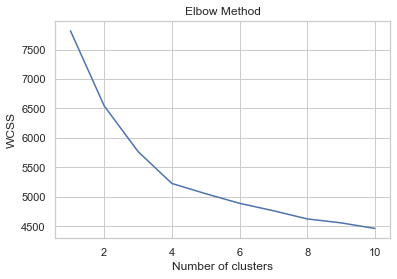

In [152]:
#Reference - https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

#finding best number of clusters
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

wcss = []
#within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=1994)
    kmeans.fit(df_long_cluster)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We used the Elbow Method to determine a suitable number of clusters. This graphically represents the decrease in distortion as k increases. Using the graph above, we decided that k=3 or k=4 would be the best choice for this dataset.

In [153]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=1994)
#kmeans.fit(sub_cont)
pred_y = kmeans.fit_predict(df_long_cluster)

In [154]:
centroids = kmeans.cluster_centers_
labels=kmeans.labels_
print(centroids.shape)
print(kmeans.labels_.shape)
print(df_long_cluster.shape)
#print(df_long_cluster.columns)

(3, 83)
(293,)
(293, 83)


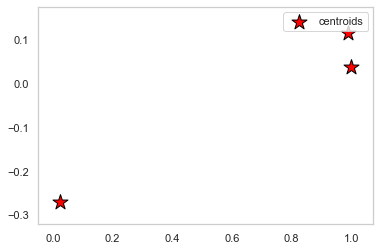

In [155]:
# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [156]:
#creating new cluster_group column in data frame for the labels
import numpy as np

#pd.options.mode.chained_assignment = None
df_long_cluster.is_copy = False

df_long_cluster['cluster_group'] = np.nan
data_length = len(df_long_cluster)
for i in range(data_length):
    df_long_cluster.iloc[i, df_long_cluster.columns.get_loc('cluster_group')] = labels[i]

In [204]:
#adding clusters to original df
df['cluster_group'] = pd.Series(predict, index=df.index)

In [157]:
survey_data_mn = df_long_cluster.groupby(['cluster_group']).mean()
survey_data_mn

,Survey_Flag,Duration,Latitude,Longitude,Hair_Length,Dry_Time,Scalp_Show,Hair_Flakes,Styling Product - Custard,Styling Product - Gel,Styling Product - Hair Spray,Styling Product - Hair Wax/Pomade,Styling Product - Mousse,Styling Product - Oil,Styling Product - Styling Cream,"Styling Product - None of these, I prefer...",Concerns - Baldness,Concerns - Breakage,Concerns - Dandruff,Concerns - Dry Scalp,Concerns - Dull hair strands,Concerns - Frizz,Concerns - Chemical and Heat Damage,Concerns - Hair Growth,Concerns - Oily Scalp,Concerns - Other,Concerns - Rough/Dry Hair,Concerns - Split Ends,Concerns - Thinning,Concerns - Too Little Volume,Concerns - Too Much Volume,Concerns - Pregnancy Related Thinning,Concerns - Baldness/Alopecia,Beard_Flag,Beard Concern - Brittle/Weak hair,Beard Concern - Dry/Flaky Skin Under Beard,Beard Concern - Frizziness,Beard Concern - Growth,Beard Concern - Itchiness,Beard Concern - Tangles,Scalp_Feel,Hair_Thickness,Grey_Hair,Hair_Treatment_Flag,Treatment - Chemical Straightening (Relaxer),Treatment - Hair Rebonding,Treatment - Keratin Treatment,Treatment - Natural extensions,Treatment - Synthetic extensions,Treatment_Freq,Race - Middle Eastearn,Race - Asian,Race - Native American,Race - African American,Race - Other,Race - South Asian,Race - Pakistani,Race - Hispanic,Age_Range,Gender - Female,Gender - Male,Gender - Other,ZipCode,Products _Base,HairType_0,HairType_1,HairType_2a,HairType_2b,HairType_2c,HairType_3a,HairType_3b,HairType_3c,HairType_4a,HairType_4b,HairType_4c,ProductSmell_0,ProductSmell_Floral,ProductSmell_Fresh,ProductSmell_Fruity,ProductSmell_Musk,ProductSmell_Spice,ProductSmell_Unscented,pca_clusters
cluster_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,1.000000,0.037727,0.295013,0.074005,0.620000,1.86,2.480000,1.760000,0.140000,0.220000,0.100000,0.060000,0.140000,0.420000,0.460000,0.300000,0.100000,0.180000,0.200000,0.300000,0.160000,0.460000,0.140000,0.240000,0.160000,0.000000,0.300000,0.260000,0.340000,0.180000,0.060000,0.000000,0.100000,0.380000,0.080000,0.100000,0.060000,0.200000,0.140000,0.100000,2.800000,3.960000,1.440000,0.040000,0.000000,0.000000,0.000000,0.040000,0.000000,1.700000,0.300000,0.180000,0.020000,0.400000,0.000000,0.120000,0.000000,0.000000,3.020000,0.560000,0.420000,0.020000,-0.123935,2.820000,0.000000,0.040000,0.140000,0.200000,0.060000,0.100000,0.140000,0.020000,0.120000,0.040000,0.140000,0.000000,0.160000,0.400000,0.120000,0.120000,0.000000,0.200000,2.960000
1.0,0.987879,0.116725,0.008832,0.051991,3.975758,2.40,2.072727,2.066667,0.139394,0.212121,0.127273,0.036364,0.212121,0.424242,0.624242,0.127273,0.036364,0.369697,0.278788,0.248485,0.212121,0.660606,0.169697,0.345455,0.169697,0.000000,0.412121,0.412121,0.272727,0.260606,0.072727,0.012121,0.036364,0.030303,0.006061,0.006061,0.006061,0.018182,0.012121,0.018182,2.381818,3.939394,1.260606,0.169697,0.042424,0.018182,0.115152,0.024242,0.018182,1.933333,0.327273,0.181818,0.018182,0.181818,0.066667,0.127273,0.000000,0.000000,2.381818,0.969697,0.024242,0.006061,0.042419,2.654545,0.006061,0.024242,0.060606,0.157576,0.187879,0.157576,0.169697,0.109091,0.066667,0.036364,0.024242,0.006061,0.278788,0.387879,0.212121,0.036364,0.024242,0.054545,0.387879
2.0,0.025641,-0.269262,-0.207654,-0.157420,3.423077,0.00,0.000000,0.000000,0.141026,0.256410,0.153846,0.038462,0.153846,0.384615,0.525641,0.102564,0.115385,0.294872,0.294872,0.294872,0.000000,0.589744,0.179487,0.230769,0.000000,0.076923,0.000000,0.333333,0.269231,0.205128,0.089744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.025641,4.089744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.615385,0.141026,0.000000,0.153846,0.038462,0.012821,0.012821,0.064103,2.051282,0.769231,0.230769,0.000000,-0.042473,2.717949,0.000000,0.012821,0.076923,0.128205,0.141026,0.217949,0.166667,0.166667,0.038462,0.012821,0.038462,0.012821,0.217949,0.384615,0.166667,0.076923,0.051282,0.089744,

In [158]:
survey_data_md = df_long_cluster.groupby(['cluster_group']).median()
survey_data_md

,Survey_Flag,Duration,Latitude,Longitude,Hair_Length,Dry_Time,Scalp_Show,Hair_Flakes,Styling Product - Custard,Styling Product - Gel,Styling Product - Hair Spray,Styling Product - Hair Wax/Pomade,Styling Product - Mousse,Styling Product - Oil,Styling Product - Styling Cream,"Styling Product - None of these, I prefer...",Concerns - Baldness,Concerns - Breakage,Concerns - Dandruff,Concerns - Dry Scalp,Concerns - Dull hair strands,Concerns - Frizz,Concerns - Chemical and Heat Damage,Concerns - Hair Growth,Concerns - Oily Scalp,Concerns - Other,Concerns - Rough/Dry Hair,Concerns - Split Ends,Concerns - Thinning,Concerns - Too Little Volume,Concerns - Too Much Volume,Concerns - Pregnancy Related Thinning,Concerns - Baldness/Alopecia,Beard_Flag,Beard Concern - Brittle/Weak hair,Beard Concern - Dry/Flaky Skin Under Beard,Beard Concern - Frizziness,Beard Concern - Growth,Beard Concern - Itchiness,Beard Concern - Tangles,Scalp_Feel,Hair_Thickness,Grey_Hair,Hair_Treatment_Flag,Treatment - Chemical Straightening (Relaxer),Treatment - Hair Rebonding,Treatment - Keratin Treatment,Treatment - Natural extensions,Treatment - Synthetic extensions,Treatment_Freq,Race - Middle Eastearn,Race - Asian,Race - Native American,Race - African American,Race - Other,Race - South Asian,Race - Pakistani,Race - Hispanic,Age_Range,Gender - Female,Gender - Male,Gender - Other,ZipCode,Products _Base,HairType_0,HairType_1,HairType_2a,HairType_2b,HairType_2c,HairType_3a,HairType_3b,HairType_3c,HairType_4a,HairType_4b,HairType_4c,ProductSmell_0,ProductSmell_Floral,ProductSmell_Fresh,ProductSmell_Fruity,ProductSmell_Musk,ProductSmell_Spice,ProductSmell_Unscented,pca_clusters
cluster_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,1,-0.085978,0.467124,0.237236,1.0,2.0,3.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3.0,1.0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,2.0,1,0,0,0.012877,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1.0,1,0.146456,-0.060127,0.068729,4.0,2.0,2.0,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3.0,1.0,0,0,0,0,0,0,2.0,0,0,0,0,0,0,0,0,2.0,1,0,0,0.012877,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2.0,0,-0.357292,-0.060127,-0.443365,4.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4.0,0.0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,2.0,1,0,0,0.012877,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [159]:
df_long_cluster.groupby(['cluster_group']).describe()

Survey_Flag                                               \
                    count      mean       std  min  25%  50%  75%  max   
cluster_group                                                            
0.0                  50.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
1.0                 165.0  0.987879  0.109760  0.0  1.0  1.0  1.0  1.0   
2.0                  78.0  0.025641  0.159085  0.0  0.0  0.0  0.0  1.0   

              Duration                                                    \
                 count      mean       std       min       25%       50%   
cluster_group                                                              
0.0               50.0  0.037727  0.860391 -2.465070 -0.575523 -0.085978   
1.0              165.0  0.116725  0.942739 -2.042561 -0.530320  0.146456   
2.0               78.0 -0.269262  1.374303 -5.199338 -1.180254 -0.357292   

                                  Latitude                                \
                    75%       max    count      mean       std       min   
cluster_group                                                              
0.0            0.572848  2.465070     50.0  0.295013  1.400746 -2.042561   
1.0            0.729406  2.704083    165.0  0.008832  0.961098 -2.704083   
2.0            0.508277  5.199338     78.0 -0.207654  1.017917 -5.199338   

                                                      Longitude            \
                    25%       50%       75%       max     count      mean   
cluster_group                                                               
0.0           -0.561613  0.467124  1.015385  5.199338      50.0  0.074005   
1.0           -0.555186 -0.060127  0.718251  2.465070     165.0  0.051991   
2.0           -0.820923 -0.060127  0.467124  2.042561      78.0 -0.157420   

                                                                           \
                    std       min       25%       50%       75%       max   
cluster_group                                                               
0.0            1.293267 -2.704083 -0.886063  0.237236  1.070828  2.465070   
1.0            1.009382 -5.199338 -0.481534  0.068729  0.690745  2.704083   
2.0            1.041174 -2.042561 -0.816204 -0.443365  0.445722  5.199338   

              Hair_Length                                               \
                    count      mean       std  min  25%  50%  75%  max   
cluster_group                                                            
0.0                  50.0  0.620000  0.602376  0.0  0.0  1.0  1.0  2.0   
1.0                 165.0  3.975758  0.818621  2.0  3.0  4.0  5.0  5.0   
2.0                  78.0  3.423077  1.472865  1.0  3.0  4.0  5.0  5.0   

              Dry_Time                                          Scalp_Show  \
                 count  mean       std  min  25%  50%  75%  max      count   
cluster_group                                                                
0.0               50.0  1.86  0.782722  1.0  1.0  2.0  2.0  3.0       50.0   
1.0              165.0  2.40  0.571690  1.0  2.0  2.0  3.0  3.0      165.0   
2.0               78.0  0.00  0.000000  0.0  0.0  0.0  0.0  0.0       78.0   

                                                          Hair_Flakes  \
                   mean      std  min  25%  50%  75%  max       count   
cluster_group                                                           
0.0            2.480000  0.67733  1.0  2.0  3.0  3.0  3.0        50.0   
1.0            2.072727  0.69461  1.0  2.0  2.0  3.0  3.0       165.0   
2.0            0.000000  0.00000  0.0  0.0  0.0  0.0  0.0        78.0   

                                                            \
                   mean       std  min  25%  50%  75%  max   
cluster_group                                                
0.0            1.760000  1.041192  1.0  1.0  1.0  2.0  4.0   
1.0            2.066667  1.077108  1.0  1.0  2.0  3.0  4.0   
2.0            0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   

   

In [165]:
#adding counts
survey_data_md['Counts'] = pd.Series(df_long_cluster.groupby(['cluster_group']).size())
survey_data_md

,Survey_Flag,Duration,Latitude,Longitude,Hair_Length,Dry_Time,Scalp_Show,Hair_Flakes,Styling Product - Custard,Styling Product - Gel,Styling Product - Hair Spray,Styling Product - Hair Wax/Pomade,Styling Product - Mousse,Styling Product - Oil,Styling Product - Styling Cream,"Styling Product - None of these, I prefer...",Concerns - Baldness,Concerns - Breakage,Concerns - Dandruff,Concerns - Dry Scalp,Concerns - Dull hair strands,Concerns - Frizz,Concerns - Chemical and Heat Damage,Concerns - Hair Growth,Concerns - Oily Scalp,Concerns - Other,Concerns - Rough/Dry Hair,Concerns - Split Ends,Concerns - Thinning,Concerns - Too Little Volume,Concerns - Too Much Volume,Concerns - Pregnancy Related Thinning,Concerns - Baldness/Alopecia,Beard_Flag,Beard Concern - Brittle/Weak hair,Beard Concern - Dry/Flaky Skin Under Beard,Beard Concern - Frizziness,Beard Concern - Growth,Beard Concern - Itchiness,Beard Concern - Tangles,Scalp_Feel,Hair_Thickness,Grey_Hair,Hair_Treatment_Flag,Treatment - Chemical Straightening (Relaxer),Treatment - Hair Rebonding,Treatment - Keratin Treatment,Treatment - Natural extensions,Treatment - Synthetic extensions,Treatment_Freq,Race - Middle Eastearn,Race - Asian,Race - Native American,Race - African American,Race - Other,Race - South Asian,Race - Pakistani,Race - Hispanic,Age_Range,Gender - Female,Gender - Male,Gender - Other,ZipCode,Products _Base,HairType_0,HairType_1,HairType_2a,HairType_2b,HairType_2c,HairType_3a,HairType_3b,HairType_3c,HairType_4a,HairType_4b,HairType_4c,ProductSmell_0,ProductSmell_Floral,ProductSmell_Fresh,ProductSmell_Fruity,ProductSmell_Musk,ProductSmell_Spice,ProductSmell_Unscented,pca_clusters,Counts
cluster_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,1,-0.085978,0.467124,0.237236,1.0,2.0,3.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3.0,1.0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,2.0,1,0,0,0.012877,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,50
1.0,1,0.146456,-0.060127,0.068729,4.0,2.0,2.0,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3.0,1.0,0,0,0,0,0,0,2.0,0,0,0,0,0,0,0,0,2.0,1,0,0,0.012877,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,165
2.0,0,-0.357292,-0.060127,-0.443365,4.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4.0,0.0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,2.0,1,0,0,0.012877,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,78


In [166]:
#adding counts
survey_data_mn['Counts'] = pd.Series(df_long_cluster.groupby(['cluster_group']).size())
survey_data_mn

,Survey_Flag,Duration,Latitude,Longitude,Hair_Length,Dry_Time,Scalp_Show,Hair_Flakes,Styling Product - Custard,Styling Product - Gel,Styling Product - Hair Spray,Styling Product - Hair Wax/Pomade,Styling Product - Mousse,Styling Product - Oil,Styling Product - Styling Cream,"Styling Product - None of these, I prefer...",Concerns - Baldness,Concerns - Breakage,Concerns - Dandruff,Concerns - Dry Scalp,Concerns - Dull hair strands,Concerns - Frizz,Concerns - Chemical and Heat Damage,Concerns - Hair Growth,Concerns - Oily Scalp,Concerns - Other,Concerns - Rough/Dry Hair,Concerns - Split Ends,Concerns - Thinning,Concerns - Too Little Volume,Concerns - Too Much Volume,Concerns - Pregnancy Related Thinning,Concerns - Baldness/Alopecia,Beard_Flag,Beard Concern - Brittle/Weak hair,Beard Concern - Dry/Flaky Skin Under Beard,Beard Concern - Frizziness,Beard Concern - Growth,Beard Concern - Itchiness,Beard Concern - Tangles,Scalp_Feel,Hair_Thickness,Grey_Hair,Hair_Treatment_Flag,Treatment - Chemical Straightening (Relaxer),Treatment - Hair Rebonding,Treatment - Keratin Treatment,Treatment - Natural extensions,Treatment - Synthetic extensions,Treatment_Freq,Race - Middle Eastearn,Race - Asian,Race - Native American,Race - African American,Race - Other,Race - South Asian,Race - Pakistani,Race - Hispanic,Age_Range,Gender - Female,Gender - Male,Gender - Other,ZipCode,Products _Base,HairType_0,HairType_1,HairType_2a,HairType_2b,HairType_2c,HairType_3a,HairType_3b,HairType_3c,HairType_4a,HairType_4b,HairType_4c,ProductSmell_0,ProductSmell_Floral,ProductSmell_Fresh,ProductSmell_Fruity,ProductSmell_Musk,ProductSmell_Spice,ProductSmell_Unscented,pca_clusters,Counts
cluster_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,1.000000,0.037727,0.295013,0.074005,0.620000,1.86,2.480000,1.760000,0.140000,0.220000,0.100000,0.060000,0.140000,0.420000,0.460000,0.300000,0.100000,0.180000,0.200000,0.300000,0.160000,0.460000,0.140000,0.240000,0.160000,0.000000,0.300000,0.260000,0.340000,0.180000,0.060000,0.000000,0.100000,0.380000,0.080000,0.100000,0.060000,0.200000,0.140000,0.100000,2.800000,3.960000,1.440000,0.040000,0.000000,0.000000,0.000000,0.040000,0.000000,1.700000,0.300000,0.180000,0.020000,0.400000,0.000000,0.120000,0.000000,0.000000,3.020000,0.560000,0.420000,0.020000,-0.123935,2.820000,0.000000,0.040000,0.140000,0.200000,0.060000,0.100000,0.140000,0.020000,0.120000,0.040000,0.140000,0.000000,0.160000,0.400000,0.120000,0.120000,0.000000,0.200000,2.960000,50
1.0,0.987879,0.116725,0.008832,0.051991,3.975758,2.40,2.072727,2.066667,0.139394,0.212121,0.127273,0.036364,0.212121,0.424242,0.624242,0.127273,0.036364,0.369697,0.278788,0.248485,0.212121,0.660606,0.169697,0.345455,0.169697,0.000000,0.412121,0.412121,0.272727,0.260606,0.072727,0.012121,0.036364,0.030303,0.006061,0.006061,0.006061,0.018182,0.012121,0.018182,2.381818,3.939394,1.260606,0.169697,0.042424,0.018182,0.115152,0.024242,0.018182,1.933333,0.327273,0.181818,0.018182,0.181818,0.066667,0.127273,0.000000,0.000000,2.381818,0.969697,0.024242,0.006061,0.042419,2.654545,0.006061,0.024242,0.060606,0.157576,0.187879,0.157576,0.169697,0.109091,0.066667,0.036364,0.024242,0.006061,0.278788,0.387879,0.212121,0.036364,0.024242,0.054545,0.387879,165
2.0,0.025641,-0.269262,-0.207654,-0.157420,3.423077,0.00,0.000000,0.000000,0.141026,0.256410,0.153846,0.038462,0.153846,0.384615,0.525641,0.102564,0.115385,0.294872,0.294872,0.294872,0.000000,0.589744,0.179487,0.230769,0.000000,0.076923,0.000000,0.333333,0.269231,0.205128,0.089744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.025641,4.089744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.615385,0.141026,0.000000,0.153846,0.038462,0.012821,0.012821,0.064103,2.051282,0.769231,0.230769,0.000000,-0.042473,2.717949,0.000000,0.012821,0.076923,0.128205,0.141026,0.217949,0.166667,0.166667,0.038462,0.012821,0.038462,0.012821,0.217949,0.384615,0.166667,0.076923,0.0

In [172]:
#pd.set_option('display.max_columns', None)
df_long_cluster[ df_long_cluster['cluster_group'] == 0 ].describe()

,Survey_Flag,Duration,Latitude,Longitude,Hair_Length,Dry_Time,Scalp_Show,Hair_Flakes,Styling Product - Custard,Styling Product - Gel,Styling Product - Hair Spray,Styling Product - Hair Wax/Pomade,Styling Product - Mousse,Styling Product - Oil,Styling Product - Styling Cream,"Styling Product - None of these, I prefer...",Concerns - Baldness,Concerns - Breakage,Concerns - Dandruff,Concerns - Dry Scalp,Concerns - Dull hair strands,Concerns - Frizz,Concerns - Chemical and Heat Damage,Concerns - Hair Growth,Concerns - Oily Scalp,Concerns - Other,Concerns - Rough/Dry Hair,Concerns - Split Ends,Concerns - Thinning,Concerns - Too Little Volume,Concerns - Too Much Volume,Concerns - Pregnancy Related Thinning,Concerns - Baldness/Alopecia,Beard_Flag,Beard Concern - Brittle/Weak hair,Beard Concern - Dry/Flaky Skin Under Beard,Beard Concern - Frizziness,Beard Concern - Growth,Beard Concern - Itchiness,Beard Concern - Tangles,Scalp_Feel,Hair_Thickness,Grey_Hair,Hair_Treatment_Flag,Treatment - Chemical Straightening (Relaxer),Treatment - Hair Rebonding,Treatment - Keratin Treatment,Treatment - Natural extensions,Treatment - Synthetic extensions,Treatment_Freq,Race - Middle Eastearn,Race - Asian,Race - Native American,Race - African American,Race - Other,Race - South Asian,Race - Pakistani,Race - Hispanic,Age_Range,Gender - Female,Gender - Male,Gender - Other,ZipCode,Products _Base,HairType_0,HairType_1,HairType_2a,HairType_2b,HairType_2c,HairType_3a,HairType_3b,HairType_3c,HairType_4a,HairType_4b,HairType_4c,ProductSmell_0,ProductSmell_Floral,ProductSmell_Fresh,ProductSmell_Fruity,ProductSmell_Musk,ProductSmell_Spice,ProductSmell_Unscented,pca_clusters,cluster_group
count,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.00000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.0,50.00000,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.0,50.0,50.000000,50.0,50.000000,50.00000,50.000000,50.000000,50.000000,50.0,50.000000,50.0,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.00000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.00000,50.0,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.000000,50.0
mean,1.0,0.037727,0.295013,0.074005,0.620000,1.860000,2.48000,1.760000,0.14000,0.220000,0.100000,0.060000,0.14000,0.420000,0.460000,0.30000,0.100000,0.180000,0.200000,0.30000,0.160000,0.460000,0.14000,0.240000,0.160000,0.0,0.30000,0.260000,0.340000,0.180000,0.060000,0.0,0.100000,0.380000,0.080000,0.100000,0.060000,0.200000,0.14000,0.100000,2.800000,3.960000,1.440000,0.040000,0.0,0.0,0.0,0.040000,0.0,1.700000,0.30000,0.180000,0.020000,0.400000,0.0,0.120000,0.0,0.0,3.020000,0.560000,0.420000,0.020000,-0.123935,2.820000,0.0,0.040000,0.14000,0.200000,0.060000,0.100000,0.14000,0.020000,0.120000,0.040000,0.14000,0.0,0.160000,0.400000,0.120000,0.120000,0.0,0.200000,2.960000,0.0
std,0.0,0.860391,1.400746,1.293267,0.602376,0.782722,0.67733,1.041192,0.35051,0.418452,0.303046,0.239898,0.35051,0.498569,0.503457,0.46291,0.303046,0.388088,0.404061,0.46291,0.370328,0.503457,0.35051,0.431419,0.370328,0.0,0.46291,0.443087,0.478518,0.388088,0.239898,0.0,0.303046,0.490314,0.274048,0.303046,0.239898,0.404061,0.35051,0.303046,0.968904,1.615739,0.812153,0.197949,0.0,0.0,0.0,0.197949,0.0,1.073807,0.46291,0.388088,0.141421,0.494872,0.0,0.328261,0.0,0.0,1.463711,0.501427,0.498569,0.141421,0.979476,0.918961,0.0,0.197949,0.35051,0.404061,0.239898,0.303046,0.35051,0.141421,0.328261,0.197949,0.35051,0.0,0.370328,0.494872,0.328261,0.328261,0.0,0.404061,0.282843,0.0
min,1.0,-2.465070,-2.042561,-2.704083,0.000000,1.000000,1.00000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0

In [173]:
#pd.set_option('display.max_columns', None)
df_long_cluster[ df_long_cluster['cluster_group'] == 1 ].describe()

,Survey_Flag,Duration,Latitude,Longitude,Hair_Length,Dry_Time,Scalp_Show,Hair_Flakes,Styling Product - Custard,Styling Product - Gel,Styling Product - Hair Spray,Styling Product - Hair Wax/Pomade,Styling Product - Mousse,Styling Product - Oil,Styling Product - Styling Cream,"Styling Product - None of these, I prefer...",Concerns - Baldness,Concerns - Breakage,Concerns - Dandruff,Concerns - Dry Scalp,Concerns - Dull hair strands,Concerns - Frizz,Concerns - Chemical and Heat Damage,Concerns - Hair Growth,Concerns - Oily Scalp,Concerns - Other,Concerns - Rough/Dry Hair,Concerns - Split Ends,Concerns - Thinning,Concerns - Too Little Volume,Concerns - Too Much Volume,Concerns - Pregnancy Related Thinning,Concerns - Baldness/Alopecia,Beard_Flag,Beard Concern - Brittle/Weak hair,Beard Concern - Dry/Flaky Skin Under Beard,Beard Concern - Frizziness,Beard Concern - Growth,Beard Concern - Itchiness,Beard Concern - Tangles,Scalp_Feel,Hair_Thickness,Grey_Hair,Hair_Treatment_Flag,Treatment - Chemical Straightening (Relaxer),Treatment - Hair Rebonding,Treatment - Keratin Treatment,Treatment - Natural extensions,Treatment - Synthetic extensions,Treatment_Freq,Race - Middle Eastearn,Race - Asian,Race - Native American,Race - African American,Race - Other,Race - South Asian,Race - Pakistani,Race - Hispanic,Age_Range,Gender - Female,Gender - Male,Gender - Other,ZipCode,Products _Base,HairType_0,HairType_1,HairType_2a,HairType_2b,HairType_2c,HairType_3a,HairType_3b,HairType_3c,HairType_4a,HairType_4b,HairType_4c,ProductSmell_0,ProductSmell_Floral,ProductSmell_Fresh,ProductSmell_Fruity,ProductSmell_Musk,ProductSmell_Spice,ProductSmell_Unscented,pca_clusters,cluster_group
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.00000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0,165.0,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,0.987879,0.116725,0.008832,0.051991,3.975758,2.40000,2.072727,2.066667,0.139394,0.212121,0.127273,0.036364,0.212121,0.424242,0.624242,0.127273,0.036364,0.369697,0.278788,0.248485,0.212121,0.660606,0.169697,0.345455,0.169697,0.0,0.412121,0.412121,0.272727,0.260606,0.072727,0.012121,0.036364,0.030303,0.006061,0.006061,0.006061,0.018182,0.012121,0.018182,2.381818,3.939394,1.260606,0.169697,0.042424,0.018182,0.115152,0.024242,0.018182,1.933333,0.327273,0.181818,0.018182,0.181818,0.066667,0.127273,0.0,0.0,2.381818,0.969697,0.024242,0.006061,0.042419,2.654545,0.006061,0.024242,0.060606,0.157576,0.187879,0.157576,0.169697,0.109091,0.066667,0.036364,0.024242,0.006061,0.278788,0.387879,0.212121,0.036364,0.024242,0.054545,0.387879,1.0
std,0.109760,0.942739,0.961098,1.009382,0.818621,0.57169,0.694610,1.077108,0.347412,0.410055,0.334293,0.187763,0.410055,0.495732,0.485792,0.334293,0.187763,0.484192,0.449768,0.433450,0.410055,0.474945,0.376509,0.476964,0.376509,0.0,0.493715,0.493715,0.446718,0.440302,0.260479,0.109760,0.187763,0.171942,0.077850,0.077850,0.077850,0.134015,0.109760,0.134015,0.907104,1.758939,0.516755,0.376509,0.202169,0.134015,0.320176,0.154269,0.134015,1.148346,0.470646,0.386869,0.134015,0.386869,0.250203,0.334293,0.0,0.0,0.996780,0.171942,0.154269,0.077850,1.177101,0.754293,0.077850,0.154269,0.239333,0.365452,0.391804,0.365452,0.376509,0.312702,0.250203,0.187763,0.154269,0.077850

In [174]:
#pd.set_option('display.max_columns', None)
df_long_cluster[ df_long_cluster['cluster_group'] == 2 ].describe()

,Survey_Flag,Duration,Latitude,Longitude,Hair_Length,Dry_Time,Scalp_Show,Hair_Flakes,Styling Product - Custard,Styling Product - Gel,Styling Product - Hair Spray,Styling Product - Hair Wax/Pomade,Styling Product - Mousse,Styling Product - Oil,Styling Product - Styling Cream,"Styling Product - None of these, I prefer...",Concerns - Baldness,Concerns - Breakage,Concerns - Dandruff,Concerns - Dry Scalp,Concerns - Dull hair strands,Concerns - Frizz,Concerns - Chemical and Heat Damage,Concerns - Hair Growth,Concerns - Oily Scalp,Concerns - Other,Concerns - Rough/Dry Hair,Concerns - Split Ends,Concerns - Thinning,Concerns - Too Little Volume,Concerns - Too Much Volume,Concerns - Pregnancy Related Thinning,Concerns - Baldness/Alopecia,Beard_Flag,Beard Concern - Brittle/Weak hair,Beard Concern - Dry/Flaky Skin Under Beard,Beard Concern - Frizziness,Beard Concern - Growth,Beard Concern - Itchiness,Beard Concern - Tangles,Scalp_Feel,Hair_Thickness,Grey_Hair,Hair_Treatment_Flag,Treatment - Chemical Straightening (Relaxer),Treatment - Hair Rebonding,Treatment - Keratin Treatment,Treatment - Natural extensions,Treatment - Synthetic extensions,Treatment_Freq,Race - Middle Eastearn,Race - Asian,Race - Native American,Race - African American,Race - Other,Race - South Asian,Race - Pakistani,Race - Hispanic,Age_Range,Gender - Female,Gender - Male,Gender - Other,ZipCode,Products _Base,HairType_0,HairType_1,HairType_2a,HairType_2b,HairType_2c,HairType_3a,HairType_3b,HairType_3c,HairType_4a,HairType_4b,HairType_4c,ProductSmell_0,ProductSmell_Floral,ProductSmell_Fresh,ProductSmell_Fruity,ProductSmell_Musk,ProductSmell_Spice,ProductSmell_Unscented,pca_clusters,cluster_group
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.0,78.0,78.0,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.0,78.000000,78.000000,78.000000,78.0,78.000000,78.0,78.000000,78.000000,78.000000,78.000000,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.000000,78.000000,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.000000,78.000000,78.0,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.0,78.000000,78.000000,78.0,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.0,78.0
mean,0.025641,-0.269262,-0.207654,-0.157420,3.423077,0.0,0.0,0.0,0.141026,0.256410,0.153846,0.038462,0.153846,0.384615,0.525641,0.102564,0.115385,0.294872,0.294872,0.294872,0.0,0.589744,0.179487,0.230769,0.0,0.076923,0.0,0.333333,0.269231,0.205128,0.089744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.025641,4.089744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.615385,0.141026,0.0,0.153846,0.038462,0.012821,0.012821,0.064103,2.051282,0.769231,0.230769,0.0,-0.042473,2.717949,0.0,0.012821,0.076923,0.128205,0.141026,0.217949,0.166667,0.166667,0.038462,0.012821,0.038462,0.012821,0.217949,0.384615,0.166667,0.076923,0.051282,0.089744,2.0,2.0
std,0.159085,1.374303,1.017917,1.041174,1.472865,0.0,0.0,0.0,0.350301,0.439477,0.363137,0.193552,0.363137,0.489653,0.502574,0.305352,0.321553,0.458936,0.458936,0.458936,0.0,0.495064,0.386244,0.424052,0.0,0.268194,0.0,0.474456,0.446431,0.406409,0.287664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.821376,0.928424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.489653,0.350301,0.0,0.363137,0.193552,0.113228,0.113228,0.246521,0.754165,0.424052,0.424052,0.0,1.014372,0.642589,0.0,0.113228,0.268194,0.336482,0.350301,0.415525,0.375090,0.375090,0.193552,0.113228,0.193552,0.113228,0.415525,0.489653,0.375090,0.268194,0.222000,0.287664,0.0,0.0
min,0.000000,-5.199338,-5.199338,-2.042561,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000

In [176]:
df_long_cluster.head(10)

,Survey_Flag,Duration,Latitude,Longitude,Hair_Length,Dry_Time,Scalp_Show,Hair_Flakes,Styling Product - Custard,Styling Product - Gel,Styling Product - Hair Spray,Styling Product - Hair Wax/Pomade,Styling Product - Mousse,Styling Product - Oil,Styling Product - Styling Cream,"Styling Product - None of these, I prefer...",Concerns - Baldness,Concerns - Breakage,Concerns - Dandruff,Concerns - Dry Scalp,Concerns - Dull hair strands,Concerns - Frizz,Concerns - Chemical and Heat Damage,Concerns - Hair Growth,Concerns - Oily Scalp,Concerns - Other,Concerns - Rough/Dry Hair,Concerns - Split Ends,Concerns - Thinning,Concerns - Too Little Volume,Concerns - Too Much Volume,Concerns - Pregnancy Related Thinning,Concerns - Baldness/Alopecia,Beard_Flag,Beard Concern - Brittle/Weak hair,Beard Concern - Dry/Flaky Skin Under Beard,Beard Concern - Frizziness,Beard Concern - Growth,Beard Concern - Itchiness,Beard Concern - Tangles,Scalp_Feel,Hair_Thickness,Grey_Hair,Hair_Treatment_Flag,Treatment - Chemical Straightening (Relaxer),Treatment - Hair Rebonding,Treatment - Keratin Treatment,Treatment - Natural extensions,Treatment - Synthetic extensions,Treatment_Freq,Race - Middle Eastearn,Race - Asian,Race - Native American,Race - African American,Race - Other,Race - South Asian,Race - Pakistani,Race - Hispanic,Age_Range,Gender - Female,Gender - Male,Gender - Other,ZipCode,Products _Base,HairType_0,HairType_1,HairType_2a,HairType_2b,HairType_2c,HairType_3a,HairType_3b,HairType_3c,HairType_4a,HairType_4b,HairType_4c,ProductSmell_0,ProductSmell_Floral,ProductSmell_Fresh,ProductSmell_Fruity,ProductSmell_Musk,ProductSmell_Spice,ProductSmell_Unscented,pca_clusters,cluster_group
0,1,-0.225079,-0.890332,-0.382548,5.0,2.0,2.0,2.0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,0,0,0,0,0,0,1.0,1,0,0,0,0,0,0,0,2.0,1,0,0,-0.476720,3.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1.0
1,1,-0.278248,0.142119,-0.264888,3.0,1.0,3.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,3.0,1.0,1,1,0,0,0,0,2.0,1,0,0,0,0,0,0,0,2.0,1,0,0,-0.332216,2.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0
2,1,1.346683,0.225079,-0.481534,5.0,2.0,3.0,4.0,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,0,0,0,0,0,0,3.0,1,0,0,0,0,0,0,0,2.0,1,0,0,-0.332216,3.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1.0
3,1,0.012877,-1.368253,-1.461656,4.0,2.0,3.0,2.0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,3.0,1.0,1,0,0,1,0,0,4.0,1,0,0,0,0,0,0,0,2.0,1,0,0,1.210656,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1.0
4,1,-1.078475,0.332216,-0.642501,5.0,2.0,2.0,3.0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,0,0,0,0,0,0,1.0,1,0,0,0,0,0,0,0,2.0,1,0,0,-1.011779,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1.0
5,1,0.181259,0.332216,-0.642501,4.0,2.0,2.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,3.0,1.0,1,1,0,0,0,0,4.0,1,0,0,0,0,0,0,0,2.0,1,0,0,-1.011779,2.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0
6,1,-0.997559,0.846524,0.424457,5.0,3.0,2.0,2.0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,3,6.0,1.0,0,0,0,0,0,0,2.0,1,0,0,0,0,0,0,0,2.0,1,0,0,-0.740653,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1.0
7,1,0.396440,0.883970,-0.189992,5.0,1.0,2.0,3.0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6.0,1.0,0,0,0,0,0,0,2.0,1,0,0,0,0,0,0,0,2.0,1,0,0,-0.740653,3.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1.0
8,1,0.410408,2.704083,1.868849,1.0,1.0,1.0,2.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4,3.0,3.0,0,0,0,0,0,0,1.0,1,0,0,0,0,0,0,0,6.0,0,1,0,-1.011779,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0.0
9,1,-0.198740,0.017170,0.229483,3.0,3.0,2.0,2.0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,2,6.0,1.0,1,1,0,1,0,0,1.0,1,0,0,0,0,0,0,0,2.0,1,0,0,0.616338,3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1.0


In [191]:
#df_long_cluster.columns

In [ ]:
# visualize the data
centroids = kmeans.cluster_centers_
labels=kmeans.labels_
#colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']

fig, axs = plt.subplots(2, 2,figsize=(15,10))
axs[0, 0].scatter(df_long_cluster.iloc[:, 4], df_long_cluster.iloc[:, 7], c=kmeans.labels_, cmap='rainbow')
axs[0, 0].set_title('x vs y')
axs[0, 1].scatter(df_long_cluster.iloc[:, 9], df_long_cluster.iloc[:, 7], c=kmeans.labels_, cmap='rainbow')
axs[0, 1].set_title('x vs y')
axs[1, 0].scatter(df_long_cluster.iloc[:, 11], df_long_cluster.iloc[:, 7], c=kmeans.labels_, cmap='rainbow')
axs[1, 0].set_title('x vs y')
axs[1, 1].scatter(df_long_cluster.iloc[:, 18], df_long_cluster.iloc[:, 7], c=kmeans.labels_, cmap='rainbow')
axs[1, 1].set_title('x vs y')

#plt.scatter(df.iloc[:, 2], df.iloc[:, 4], c=kmeans.labels_, cmap='rainbow') #plot the data
#plt.title('K-means clustering for continuous features')
#plt.xlabel('sub, Bedrooms')
#plt.ylabel('sub, Price')
plt.grid()
plt.show()

In [ ]:
# visualize the data
centroids = clusters_4.cluster_centers_
labels=clusters_4.labels_
#colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']

fig, axs = plt.subplots(2, 2,figsize=(15,10))
axs[0, 0].scatter(df_long_cluster.iloc[:, 4], df_long_cluster.iloc[:, 7], c=clusters_4.labels_, cmap='rainbow')
axs[0, 0].set_title('x vs y')
axs[0, 1].scatter(df_long_cluster.iloc[:, 9], df_long_cluster.iloc[:, 7], c=clusters_4.labels_, cmap='rainbow')
axs[0, 1].set_title('x vs y')
axs[1, 0].scatter(df_long_cluster.iloc[:, 11], df_long_cluster.iloc[:, 7], c=clusters_4.labels_, cmap='rainbow')
axs[1, 0].set_title('x vs y')
axs[1, 1].scatter(df_long_cluster.iloc[:, 18], df_long_cluster.iloc[:, 7], c=clusters_4.labels_, cmap='rainbow')
axs[1, 1].set_title('x vs y')

plt.grid()
plt.show()

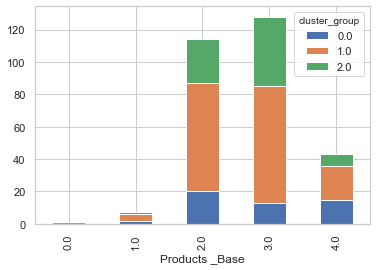

In [190]:
df_plot = df_long_cluster.groupby(['cluster_group','Products _Base']).size().reset_index().pivot(columns='cluster_group', index='Products _Base', values=0)
df_plot.plot(kind='bar', stacked=True)
#https://stackoverflow.com/questions/50319614/count-plot-with-stacked-bars-per-hue

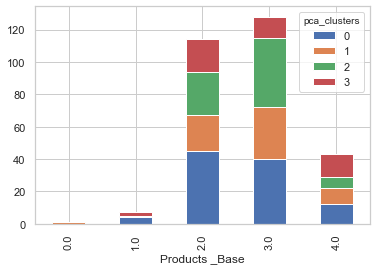

In [210]:
df_plot_ = df_long_cluster.groupby(['pca_clusters','Products _Base']).size().reset_index().pivot(columns='pca_clusters', index='Products _Base', values=0)
df_plot_.plot(kind='bar', stacked=True)
#https://stackoverflow.com/questions/50319614/count-plot-with-stacked-bars-per-hue

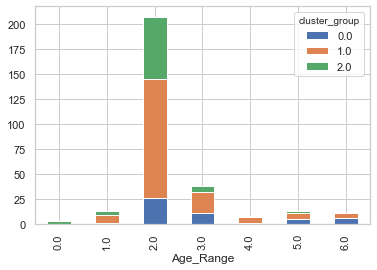

In [212]:
df_plot1 = df_long_cluster.groupby(['cluster_group','Age_Range']).size().reset_index().pivot(columns='cluster_group', index='Age_Range', values=0)
df_plot1.plot(kind='bar', stacked=True)
#https://stackoverflow.com/questions/50319614/count-plot-with-stacked-bars-per-hue

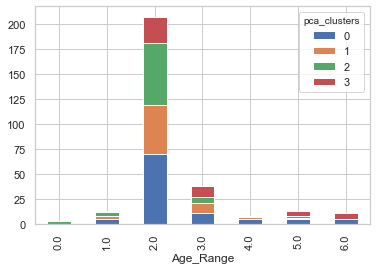

In [213]:
df_plot1_ = df_long_cluster.groupby(['pca_clusters','Age_Range']).size().reset_index().pivot(columns='pca_clusters', index='Age_Range', values=0)
df_plot1_.plot(kind='bar', stacked=True)
#https://stackoverflow.com/questions/50319614/count-plot-with-stacked-bars-per-hue

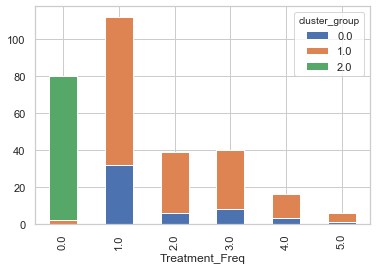

In [193]:
df_plot2 = df_long_cluster.groupby(['cluster_group','Treatment_Freq']).size().reset_index().pivot(columns='cluster_group', index='Treatment_Freq', values=0)
df_plot2.plot(kind='bar', stacked=True)
#https://stackoverflow.com/questions/50319614/count-plot-with-stacked-bars-per-hue

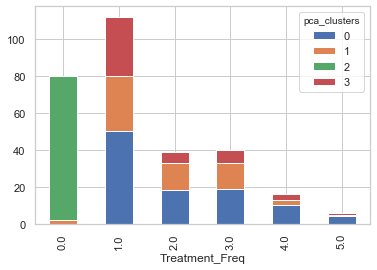

In [214]:
df_plot2_ = df_long_cluster.groupby(['pca_clusters','Treatment_Freq']).size().reset_index().pivot(columns='pca_clusters', index='Treatment_Freq', values=0)
df_plot2_.plot(kind='bar', stacked=True)
#https://stackoverflow.com/questions/50319614/count-plot-with-stacked-bars-per-hue

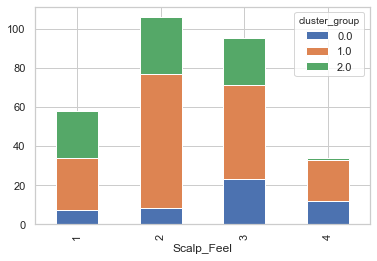

In [194]:
df_plot3 = df_long_cluster.groupby(['cluster_group','Scalp_Feel']).size().reset_index().pivot(columns='cluster_group', index='Scalp_Feel', values=0)
df_plot3.plot(kind='bar', stacked=True)

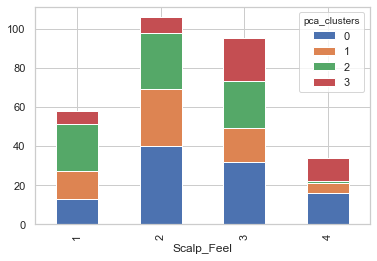

In [215]:
df_plot3_ = df_long_cluster.groupby(['pca_clusters','Scalp_Feel']).size().reset_index().pivot(columns='pca_clusters', index='Scalp_Feel', values=0)
df_plot3_.plot(kind='bar', stacked=True)

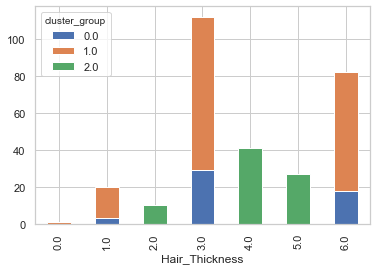

In [195]:
df_plot4 = df_long_cluster.groupby(['cluster_group','Hair_Thickness']).size().reset_index().pivot(columns='cluster_group', index='Hair_Thickness', values=0)
df_plot4.plot(kind='bar', stacked=True)

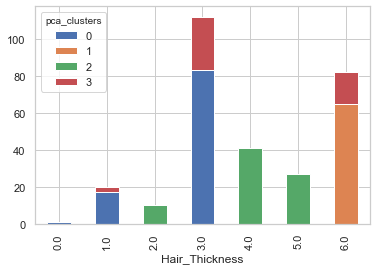

In [216]:
df_plot4_ = df_long_cluster.groupby(['pca_clusters','Hair_Thickness']).size().reset_index().pivot(columns='pca_clusters', index='Hair_Thickness', values=0)
df_plot4_.plot(kind='bar', stacked=True)

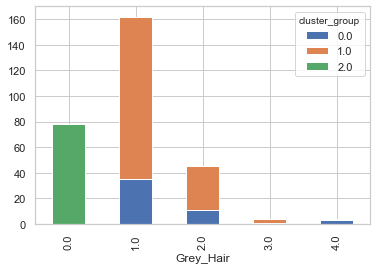

In [196]:
df_plot5 = df_long_cluster.groupby(['cluster_group','Grey_Hair']).size().reset_index().pivot(columns='cluster_group', index='Grey_Hair', values=0)
df_plot5.plot(kind='bar', stacked=True)

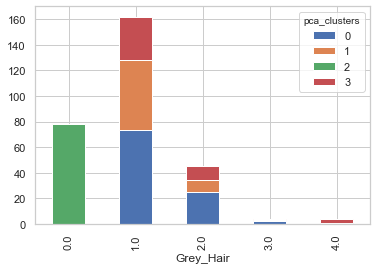

In [217]:
df_plot5_ = df_long_cluster.groupby(['pca_clusters','Grey_Hair']).size().reset_index().pivot(columns='pca_clusters', index='Grey_Hair', values=0)
df_plot5_.plot(kind='bar', stacked=True)

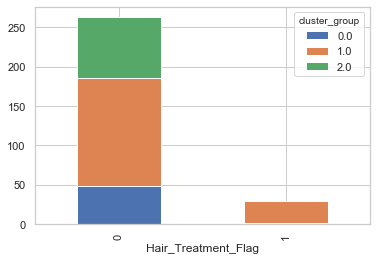

In [197]:
df_plot6 = df_long_cluster.groupby(['cluster_group','Hair_Treatment_Flag']).size().reset_index().pivot(columns='cluster_group', index='Hair_Treatment_Flag', values=0)
df_plot6.plot(kind='bar', stacked=True)

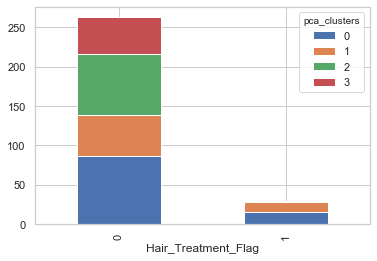

In [218]:
df_plot6_ = df_long_cluster.groupby(['pca_clusters','Hair_Treatment_Flag']).size().reset_index().pivot(columns='pca_clusters', index='Hair_Treatment_Flag', values=0)
df_plot6_.plot(kind='bar', stacked=True)

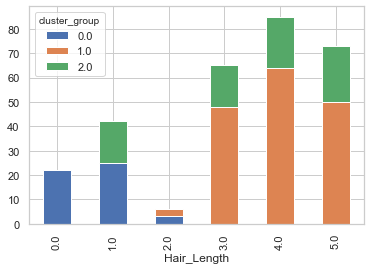

In [198]:
df_plot7 = df_long_cluster.groupby(['cluster_group','Hair_Length']).size().reset_index().pivot(columns='cluster_group', index='Hair_Length', values=0)
df_plot7.plot(kind='bar', stacked=True)

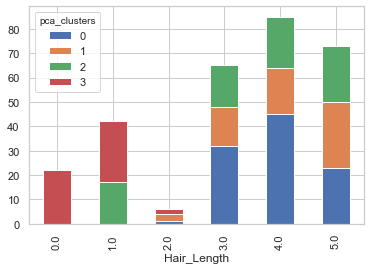

In [219]:
df_plot7_ = df_long_cluster.groupby(['pca_clusters','Hair_Length']).size().reset_index().pivot(columns='pca_clusters', index='Hair_Length', values=0)
df_plot7_.plot(kind='bar', stacked=True)

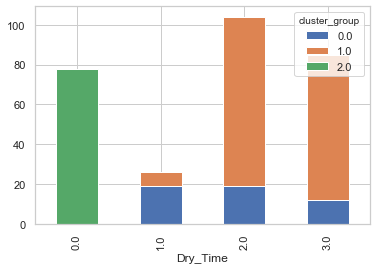

In [199]:
df_plot8 = df_long_cluster.groupby(['cluster_group','Dry_Time']).size().reset_index().pivot(columns='cluster_group', index='Dry_Time', values=0)
df_plot8.plot(kind='bar', stacked=True)

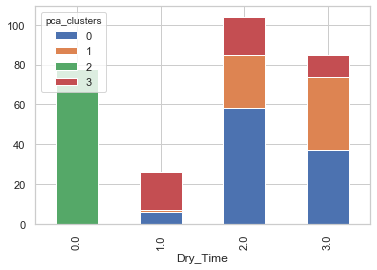

In [220]:
df_plot8_ = df_long_cluster.groupby(['pca_clusters','Dry_Time']).size().reset_index().pivot(columns='pca_clusters', index='Dry_Time', values=0)
df_plot8_.plot(kind='bar', stacked=True)

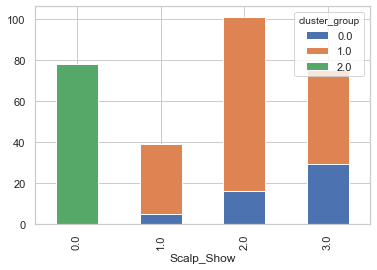

In [200]:
df_plot9 = df_long_cluster.groupby(['cluster_group','Scalp_Show']).size().reset_index().pivot(columns='cluster_group', index='Scalp_Show', values=0)
df_plot9.plot(kind='bar', stacked=True)

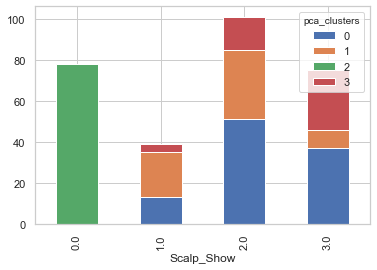

In [221]:
df_plot9_ = df_long_cluster.groupby(['pca_clusters','Scalp_Show']).size().reset_index().pivot(columns='pca_clusters', index='Scalp_Show', values=0)
df_plot9_.plot(kind='bar', stacked=True)

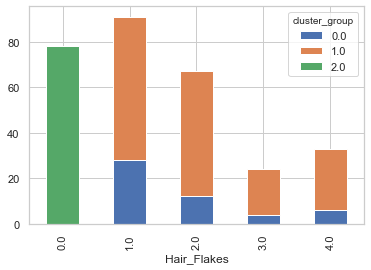

In [201]:
df_plot10 = df_long_cluster.groupby(['cluster_group','Hair_Flakes']).size().reset_index().pivot(columns='cluster_group', index='Hair_Flakes', values=0)
df_plot10.plot(kind='bar', stacked=True)

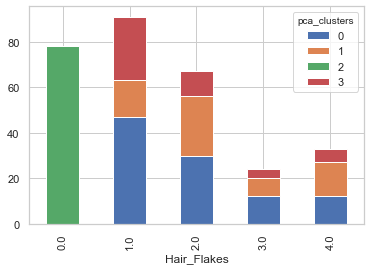

In [222]:
df_plot10_ = df_long_cluster.groupby(['pca_clusters','Hair_Flakes']).size().reset_index().pivot(columns='pca_clusters', index='Hair_Flakes', values=0)
df_plot10_.plot(kind='bar', stacked=True)

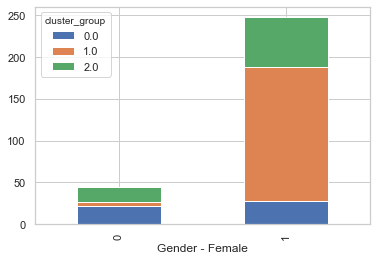

In [208]:
df_plot11 = df_long_cluster.groupby(['cluster_group','Gender - Female']).size().reset_index().pivot(columns='cluster_group', index='Gender - Female', values=0)
df_plot11.plot(kind='bar', stacked=True)

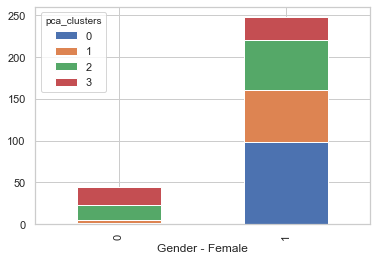

In [223]:
df_plot11_ = df_long_cluster.groupby(['pca_clusters','Gender - Female']).size().reset_index().pivot(columns='pca_clusters', index='Gender - Female', values=0)
df_plot11_.plot(kind='bar', stacked=True)

In [209]:
df.head()
#stacked chart for one-hot encoded features?

,Survey,Survey_Flag,Duration,Latitude,Longitude,HairLength,Hair_Length,DryingTime,Dry_Time,ScalpNumber,Scalp_Show,FlakesFrequency,Hair_Flakes,HairType,ProductStyling,Styling Product - Custard,Styling Product - Gel,Styling Product - Hair Spray,Styling Product - Hair Wax/Pomade,Styling Product - Mousse,Styling Product - Oil,Styling Product - Styling Cream,"Styling Product - None of these, I prefer...",ProductStylingTxt,HairProblem,Concerns - Baldness,Concerns - Breakage,Concerns - Dandruff,Concerns - Dry Scalp,Concerns - Dull hair strands,Concerns - Frizz,Concerns - Chemical and Heat Damage,Concerns - Hair Growth,Concerns - Oily Scalp,Concerns - Other,Concerns - Rough/Dry Hair,Concerns - Split Ends,Concerns - Thinning,Concerns - Too Little Volume,Concerns - Too Much Volume,Concerns - Pregnancy Related Thinning,Concerns - Baldness/Alopecia,BeardProblems,Beard_Flag,Beard Concern - Brittle/Weak hair,Beard Concern - Dry/Flaky Skin Under Beard,Beard Concern - Frizziness,Beard Concern - Growth,Beard Concern - Itchiness,Beard Concern - Tangles,ScalpfeelWash,Scalp_Feel,Strand,Hair_Thickness,HairGreyed,Grey_Hair,HairTreatment,Hair_Treatment_Flag,Treatment - Chemical Straightening (Relaxer),Treatment - Hair Rebonding,Treatment - Keratin Treatment,Treatment - Natural extensions,Treatment - Synthetic extensions,HairDry,Treatment_Freq,ProductSmell,Races,Race - Middle Eastearn,Race - Asian,Race - Native American,Race - African American,Race - Other,Race - South Asian,Race - Pakistani,Race - Hispanic,RaceTxt,AgeRange,Age_Range,Countries,Sex,Gender - Female,Gender - Male,Gender - Other,SexTxt,ZipCode,Products _Base,Porosity_,Final_Target,pca_clusters,cluster_group
0,New,1,201,32.731903,-96.905701,Mid-back or longer,5.0,1-2 hours,2.0,Some of my scalp.,2.0,Sometimes,2.0,3a,"Styling Cream,Mousse,Custard,Oil",1,0,0,0,1,1,1,0,NaN,"Hair Growth,Thinning,Split Ends,Breakage,Rough...",0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,NaN,0,0,0,0,0,0,0,Combination: Oily roots and dry ends,2,Thick and noticeable.,6.0,None at all,1.0,NaN,0,0,0,0,0,0,Rarely,1.0,Fruity,Arab or Middle Eastern,1,0,0,0,0,0,0,0,NaN,18-24,2.0,Palestine,Female,1,0,0,NaN,75061.0,3.0,Medium,3_Medium,1,1
1,New,1,199,32.896393,-96.863502,Shoulder length,3.0,Just a few minutes out of the shower,1.0,I have no problem seeing my scalp.,3.0,Rarely,1.0,2b,Custard,1,0,0,0,0,0,0,0,NaN,"Thinning,Too Little Volume,Dull hair strands,O...",0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,NaN,0,0,0,0,0,0,0,Combination: Oily roots and dry ends,2,Thin and bendable.,3.0,None at all,1.0,Chemical Straightening (Relaxer),1,1,0,0,0,0,Once or twice a year,2.0,Floral,Arab or Middle Eastern,1,0,0,0,0,0,0,0,NaN,18-24,2.0,Egypt,Female,1,0,0,NaN,75063.0,2.0,Low,2_Low,0,0
2,New,1,450,32.925995,-96.966599,Mid-back or longer,5.0,1-2 hours,2.0,I have no problem seeing my scalp.,3.0,Weekly,4.0,3b,"Styling Cream,Custard,Oil",1,0,0,0,0,1,1,0,NaN,"Hair Growth,Frizz,Dandruff,Dull hair strands,R...",0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,Combination: Oily roots and dry ends,2,Thick and noticeable.,6.0,None at all,1.0,NaN,0,0,0,0,0,0,Every few months,3.0,Floral,Arab or Middle Eastern,1,0,0,0,0,0,0,0,NaN,18-24,2.0,Egypt,Female,1,0,0,NaN,75063.0,3.0,Medium,3_Medium,1,1
3,New,1,218,30.429306,-97.720703,Armpit length,4.0,1-2 hours,2.0,I have no problem seeing my scalp.,3.0,Sometimes,2.0,3c,Styling Cream,0,0,0,0,0,0,1,0,NaN,"Thinning,Frizz,Too Little Volume,Dry Scalp,Che...",0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,NaN,0,0,0,0,0,0,0,Combination: Oily roots and dry ends,2,Thin and bendable.,3.0,None at all,1.0,Keratin Treatment,1,0,0,1,0,0,Monthly,4.0,Fruity,Arab or Middle Eastern,1,0,0,0,0,0,0,0,NaN,18-24,2.0,Jordan,Female,1,0,0,NaN,76137.0,3.0,Medium,3_Medium,0,0
4,New,1,156,32.960999,-96.984100,Mid-back or longer,5.0,1-2 hours,2.0,Some of my scalp.,2.0,Daily,3.0,3c,Styling Cream,0,0,0,0,0,0,1,0,NaN,"Hair Growth,Dry Scalp,Dandruff,Breakage,Dull h...",0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,Combination: Oily roots and dry ends,2,Thick and

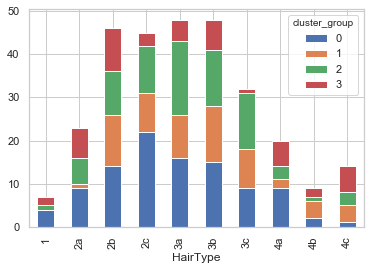

In [206]:
df_plot12 = df.groupby(['cluster_group','HairType']).size().reset_index().pivot(columns='cluster_group', index='HairType', values=0)
df_plot12.plot(kind='bar', stacked=True)